<a href="https://colab.research.google.com/github/YaninaDitz/CoderHouse-ProyectoFinal/blob/main/Proyecto_Final_Yanina_Ditz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto: Predicción de pérdidas de clientes**
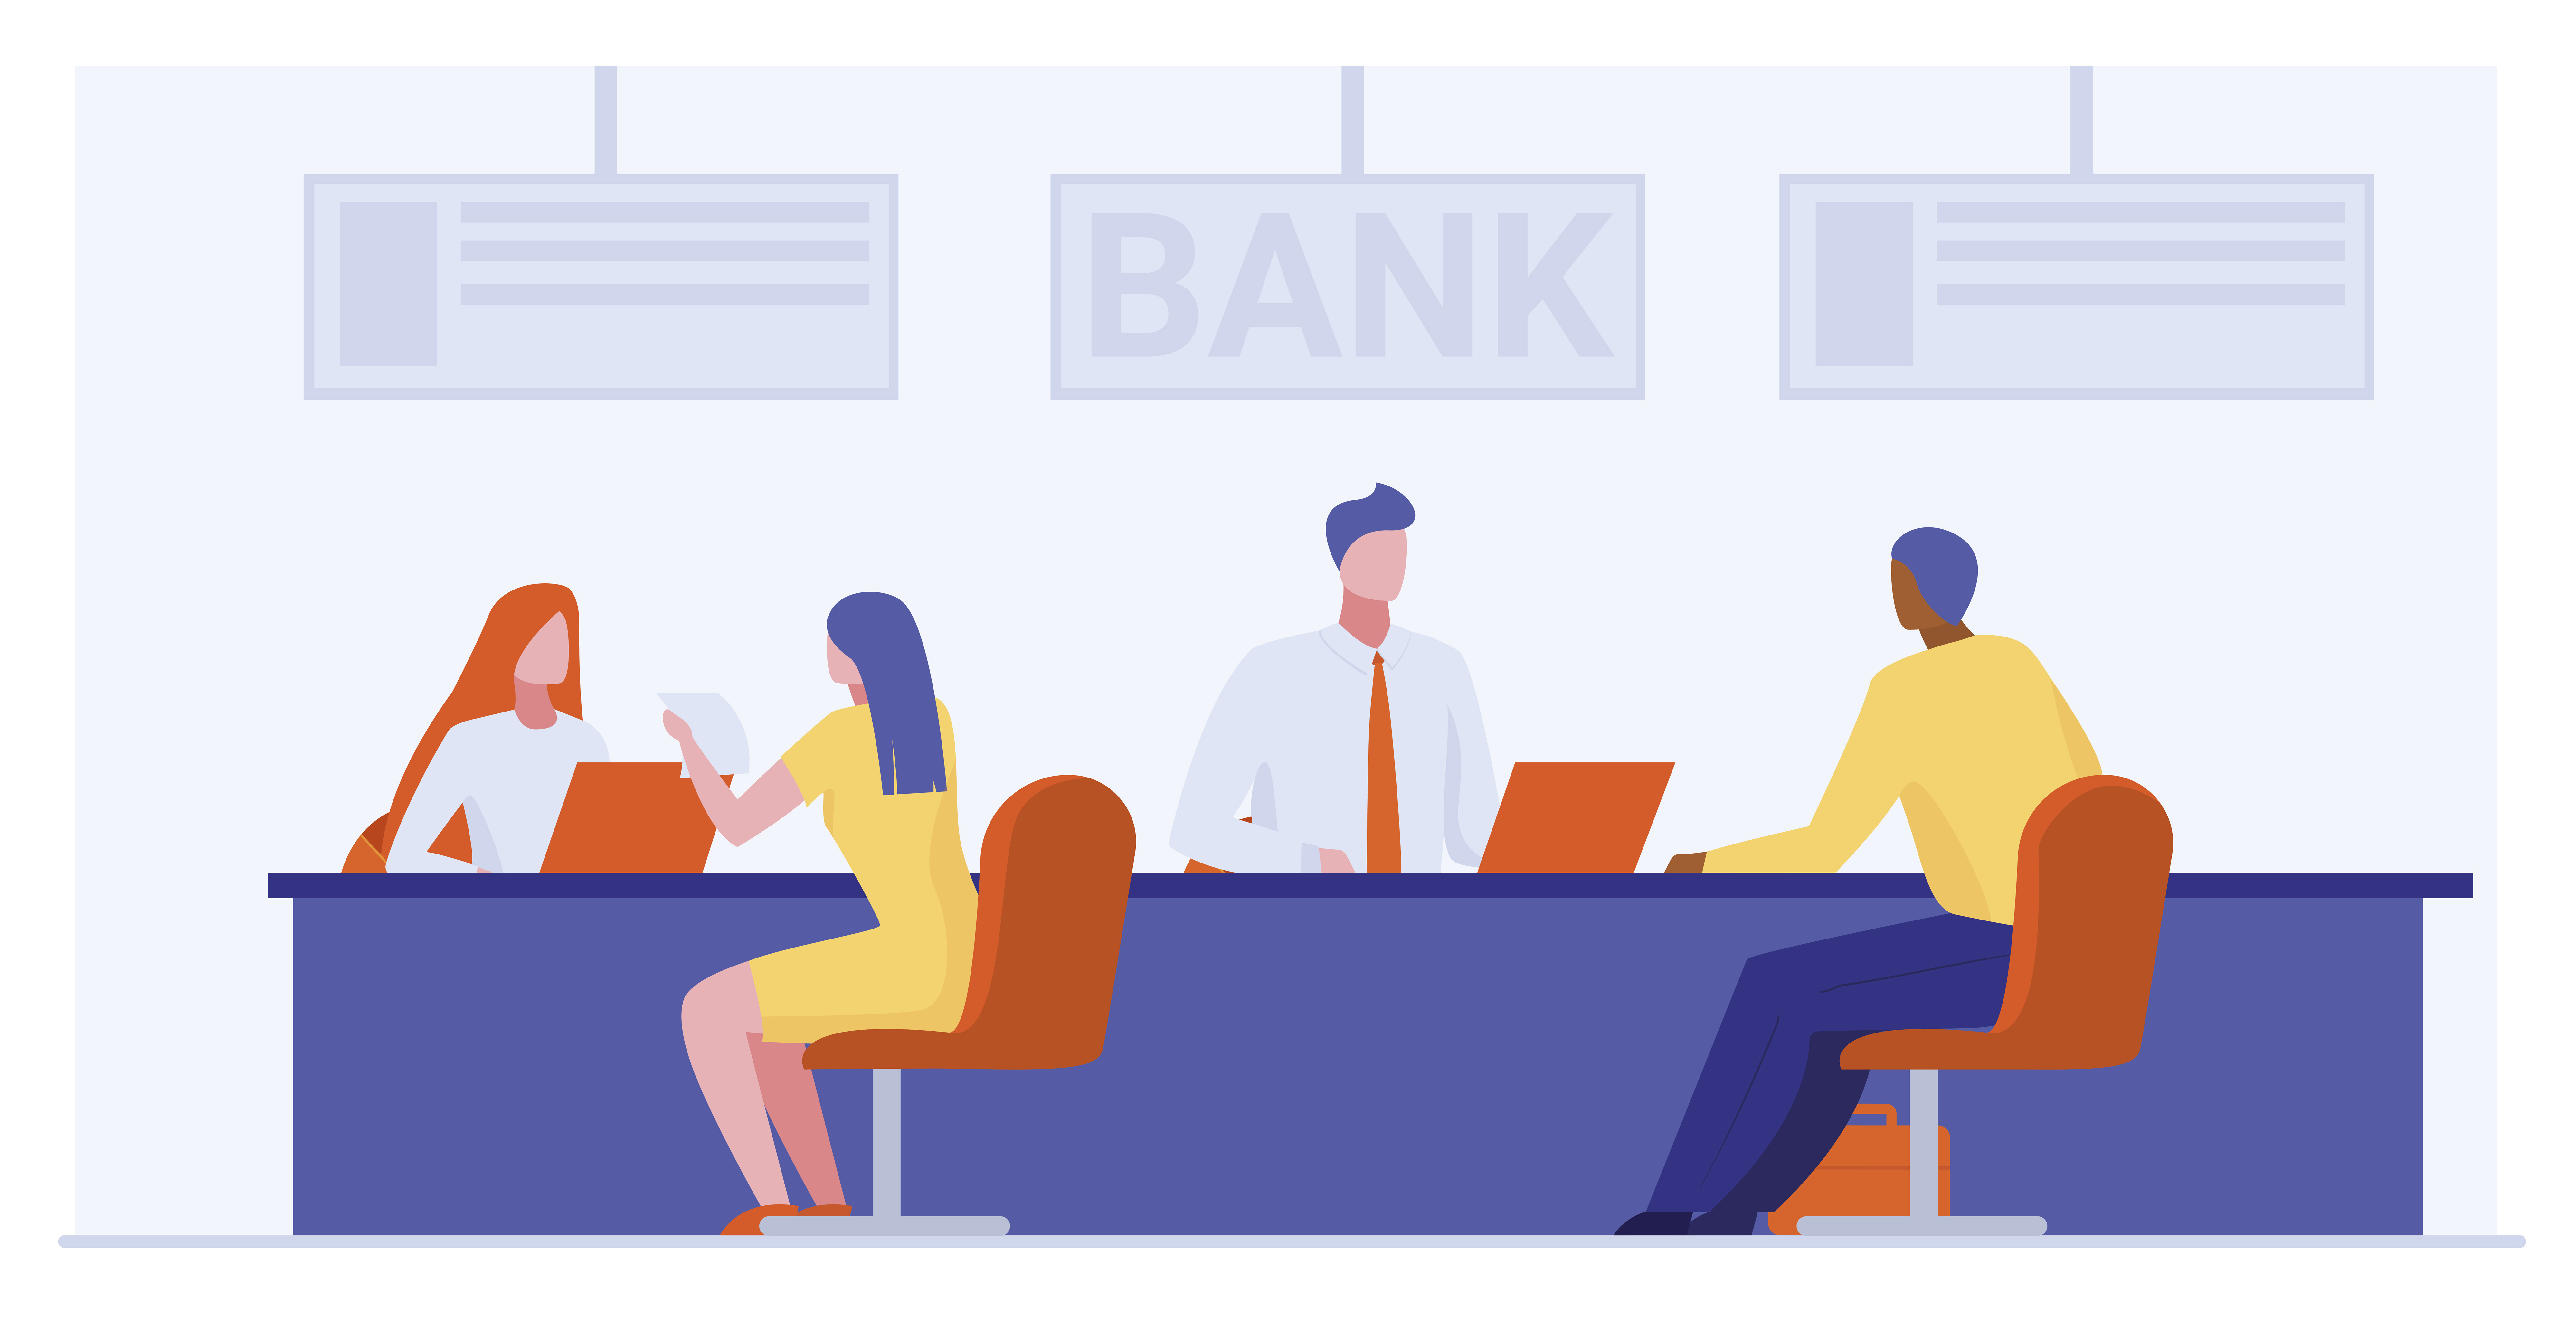

## 1. Descripción
El problema consiste en desarrollar un modelo de predicción de abandono de clientes para un banco. El objetivo es identificar a los clientes que tienen una alta probabilidad de abandonar los servicios del banco en un futuro cercano. Esta información permitirá a la institución financiera tomar medidas proactivas para retener a esos clientes, lo que a su vez puede ayudar a reducir la pérdida de ingresos y fortalecer la relación con los clientes.

---

## Datos disponibles
El banco ha recopilado un conjunto de datos históricos que contiene información relevante sobre los clientes, incluyendo características demográficas, comportamiento financiero, historial de transacciones y productos utilizados. Algunos de los atributos disponibles que se incluyen son la edad, el género, el estado civil, el nivel de ingresos, el saldo de la cuenta, la frecuencia de transacciones, los productos contratados, entre otros.

---

## Audiencia
Este proyecto está dirigido a cualquier persona interesada en aprender técnicas de análisis de datos y modelado predictivo. También incluiría a los líderes y gerentes del banco, analistas y científicos de datos, equipos de marketing y retención de clientes, y representantes de atención al cliente. Todos estos grupos se beneficiarían de la aplicación de técnicas de predicción de abandono de clientes para mejorar la retención, la satisfacción del cliente y los resultados comerciales del banco.

---

## Problema
En cualquier negocio se quiere entender el ciclo de vida del cliente e implantar metodologías para evitar que se vaya. Normalmente, en los servicios financieros, se observa que los clientes empiezan a desvincularse antes de cerrar realmente sus productos, y este es el punto en el que hay que intervenir. En este análisis se estudiarán los factores que parecen influir en el abandono de un cliente.
El principal interés es obtener un entendimiento de cómo los atributos dados se relacionan con el status "Attrited Customer", es decir aquellos que abandonan el banco.

Algunas preguntas específicas que buscamos responder son:
* ¿Cuáles son los factores que influyen en la tasa de abandono de los clientes?
* ¿Hay alguna relación entre la transacciones y la tasa de abandono?
* ¿Cómo afecta el límite del crédito a la tasa de abandono?
* ¿Qué tan precisos son los modelos de predicción para identificar a los clientes con mayor probabilidad de abandonar?

Tras un análisis exploratorio de los datos, se creará un modelo de predicción con métodos de aprendizaje automático para abordar estas preguntas y se evaluará su precisión. Para aumentar aún más la precisión del modelo, se aplicarán métodos de optimización de hiperparámetros. A continuación, se elegirá el mejor modelo y se harán sugerencias para reducir la tasa de rotación de clientes.

---

**Autor:** Yanina Ditz

**E-mail:** yaniditz@gmail.com

## 2. Librerías

In [ ]:
# Librerias de manipulación de datos y visualización
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Definición de colores y estilo
sns.set_palette("pastel")
sns.set_style("whitegrid")

plt.style.use('ggplot')
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

## 3. Carga de los datos


In [ ]:
df_final=pd.read_csv('https://raw.githubusercontent.com/YaninaDitz/Coder/main/BankChurners.csv')
df_final=df_final[df_final.columns[:-2]]
df_final.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### 3.1 Datos disponibles - Atributos
1 CLIENTNUM: ID para cada cliente. (Integer)

2 Attrition_Flag: Marca que indica si el cliente produce o no. (Boolean)

3 Customer_Age: Edad del cliente. (Integer)

4 Gender: Género del cliente. (String)

5 Dependent_count: Cantidad de personas a cargo que tiene. (Integer)

6 Education_Level: Nivel de educación del cliente. (String)

7 Marital_Status: Estado civil del cliente. (String)

8 Income_Category: Categoría de ingresos del cliente. (String)

9 Card_Category: Tipo de tarjeta del cliente. (String)

10 Months_on_book:Cuánto tiempo el cliente ha estado en los libros (Integer)

11 Total_Relationship_Count: Número total de relaciones que el cliente tiene con el proveedor de la tarjeta de crédito. (Integer)

12 Months_Inactive_12_mon: Número de meses que el cliente ha estado inactivo en los últimos doce meses. (Integer)

13 Contacts_Count_12_mon:Número de contactos que ha tenido el cliente en los últimos doce meses. (Integer)

14 Credit_Limit: Límite de crédito del cliente. (float)

15 Total_Revolving_Bal: Saldo renovable total del cliente. (Integer)

16 Avg_Open_To_Buy: Ratio medio de apertura a la compra del cliente. (float)

17 Total_Amt_Chng_Q4_Q1: Importe total cambiado del trimestre 4 al trimestre 1. (float)

18 Total_Trans_Amt: Importe total de transacciones. (Integer)

19 Total_Trans_Ct: Número total de transacciones. (Integer)

20 Total_Ct_Chng_Q4_Q1: El recuento total cambió del cuarto al primer trimestre. (float)

21 Avg_Utilization_Ratio: Ratio medio de utilización del cliente. (float)

## 4. Pre - procesamiento (Parte I)

### 4.1 Evaluando valores únicos

In [ ]:
df_final['CLIENTNUM'].nunique()

10127

### 4.2 Eliminar variables

In [ ]:
df_final.drop(columns=['CLIENTNUM'],inplace=True)

### 4.3 Missing Data

In [ ]:
missing_data = df_final.isnull()
missing_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
missing_data.sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

No se observan valores faltantes

### 4.4 Unknown data

In [ ]:
print(f"\nUnknown Values %:\n{df_final.apply(lambda x: sum(x=='Unknown') / len(df_final))}")


Unknown Values %:
Attrition_Flag              0.000000
Customer_Age                0.000000
Gender                      0.000000
Dependent_count             0.000000
Education_Level             0.149995
Marital_Status              0.073961
Income_Category             0.109805
Card_Category               0.000000
Months_on_book              0.000000
Total_Relationship_Count    0.000000
Months_Inactive_12_mon      0.000000
Contacts_Count_12_mon       0.000000
Credit_Limit                0.000000
Total_Revolving_Bal         0.000000
Avg_Open_To_Buy             0.000000
Total_Amt_Chng_Q4_Q1        0.000000
Total_Trans_Amt             0.000000
Total_Trans_Ct              0.000000
Total_Ct_Chng_Q4_Q1         0.000000
Avg_Utilization_Ratio       0.000000
dtype: float64


### 4.5 Tipo de dato

In [ ]:
df_final['Customer_Age_period'] = pd.cut(np.array(df_final['Customer_Age']),
                                              bins=int(df_final.Customer_Age.std()),
                                              precision=0)

In [ ]:
df_final['Months_on_book_Period'] = pd.cut(df_final['Months_on_book'],
                                                bins=int(df_final['Months_on_book'].std()))

In [ ]:
df_final.dtypes

Attrition_Flag                object
Customer_Age                   int64
Gender                        object
Dependent_count                int64
Education_Level               object
Marital_Status                object
Income_Category               object
Card_Category                 object
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
Customer_Age_period         category
Months_on_book_Period       category
dtype: object

### 4.6 Convertir variables

Convierto las coumnas convenientes a dtypes, "pasando" de booleanos y objeto a categóricas.

In [ ]:
cat_types = ['bool','object','category']
data_clean = df_final.copy()
data_clean[data_clean.select_dtypes(cat_types).columns] = data_clean.select_dtypes(cat_types).apply(lambda x: x.astype('category'))

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

## 5. Análisis exploratotiro de los datos - EDA

### 5.1 Análisis descriptivo

Análisis descriptivo de las variables cuantitativas.

In [ ]:
data_clean.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Análisis descriptivo para las variables categóricas.


In [ ]:
data_clean.describe(include=['category'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age_period,Months_on_book_Period
count,10127,10127,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4,8,7
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue,"(44.0, 50.0]","(31.429, 37.571]"
freq,8500,5358,3128,4687,3561,9436,2922,4085


### 5.2 Análisis de valores atípicos

In [ ]:
#Seleccionamos las variables numéricas
for col_num in data_clean.select_dtypes(('float64','int64')).columns.to_list():
    print(col_num)

Customer_Age
Dependent_count
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio


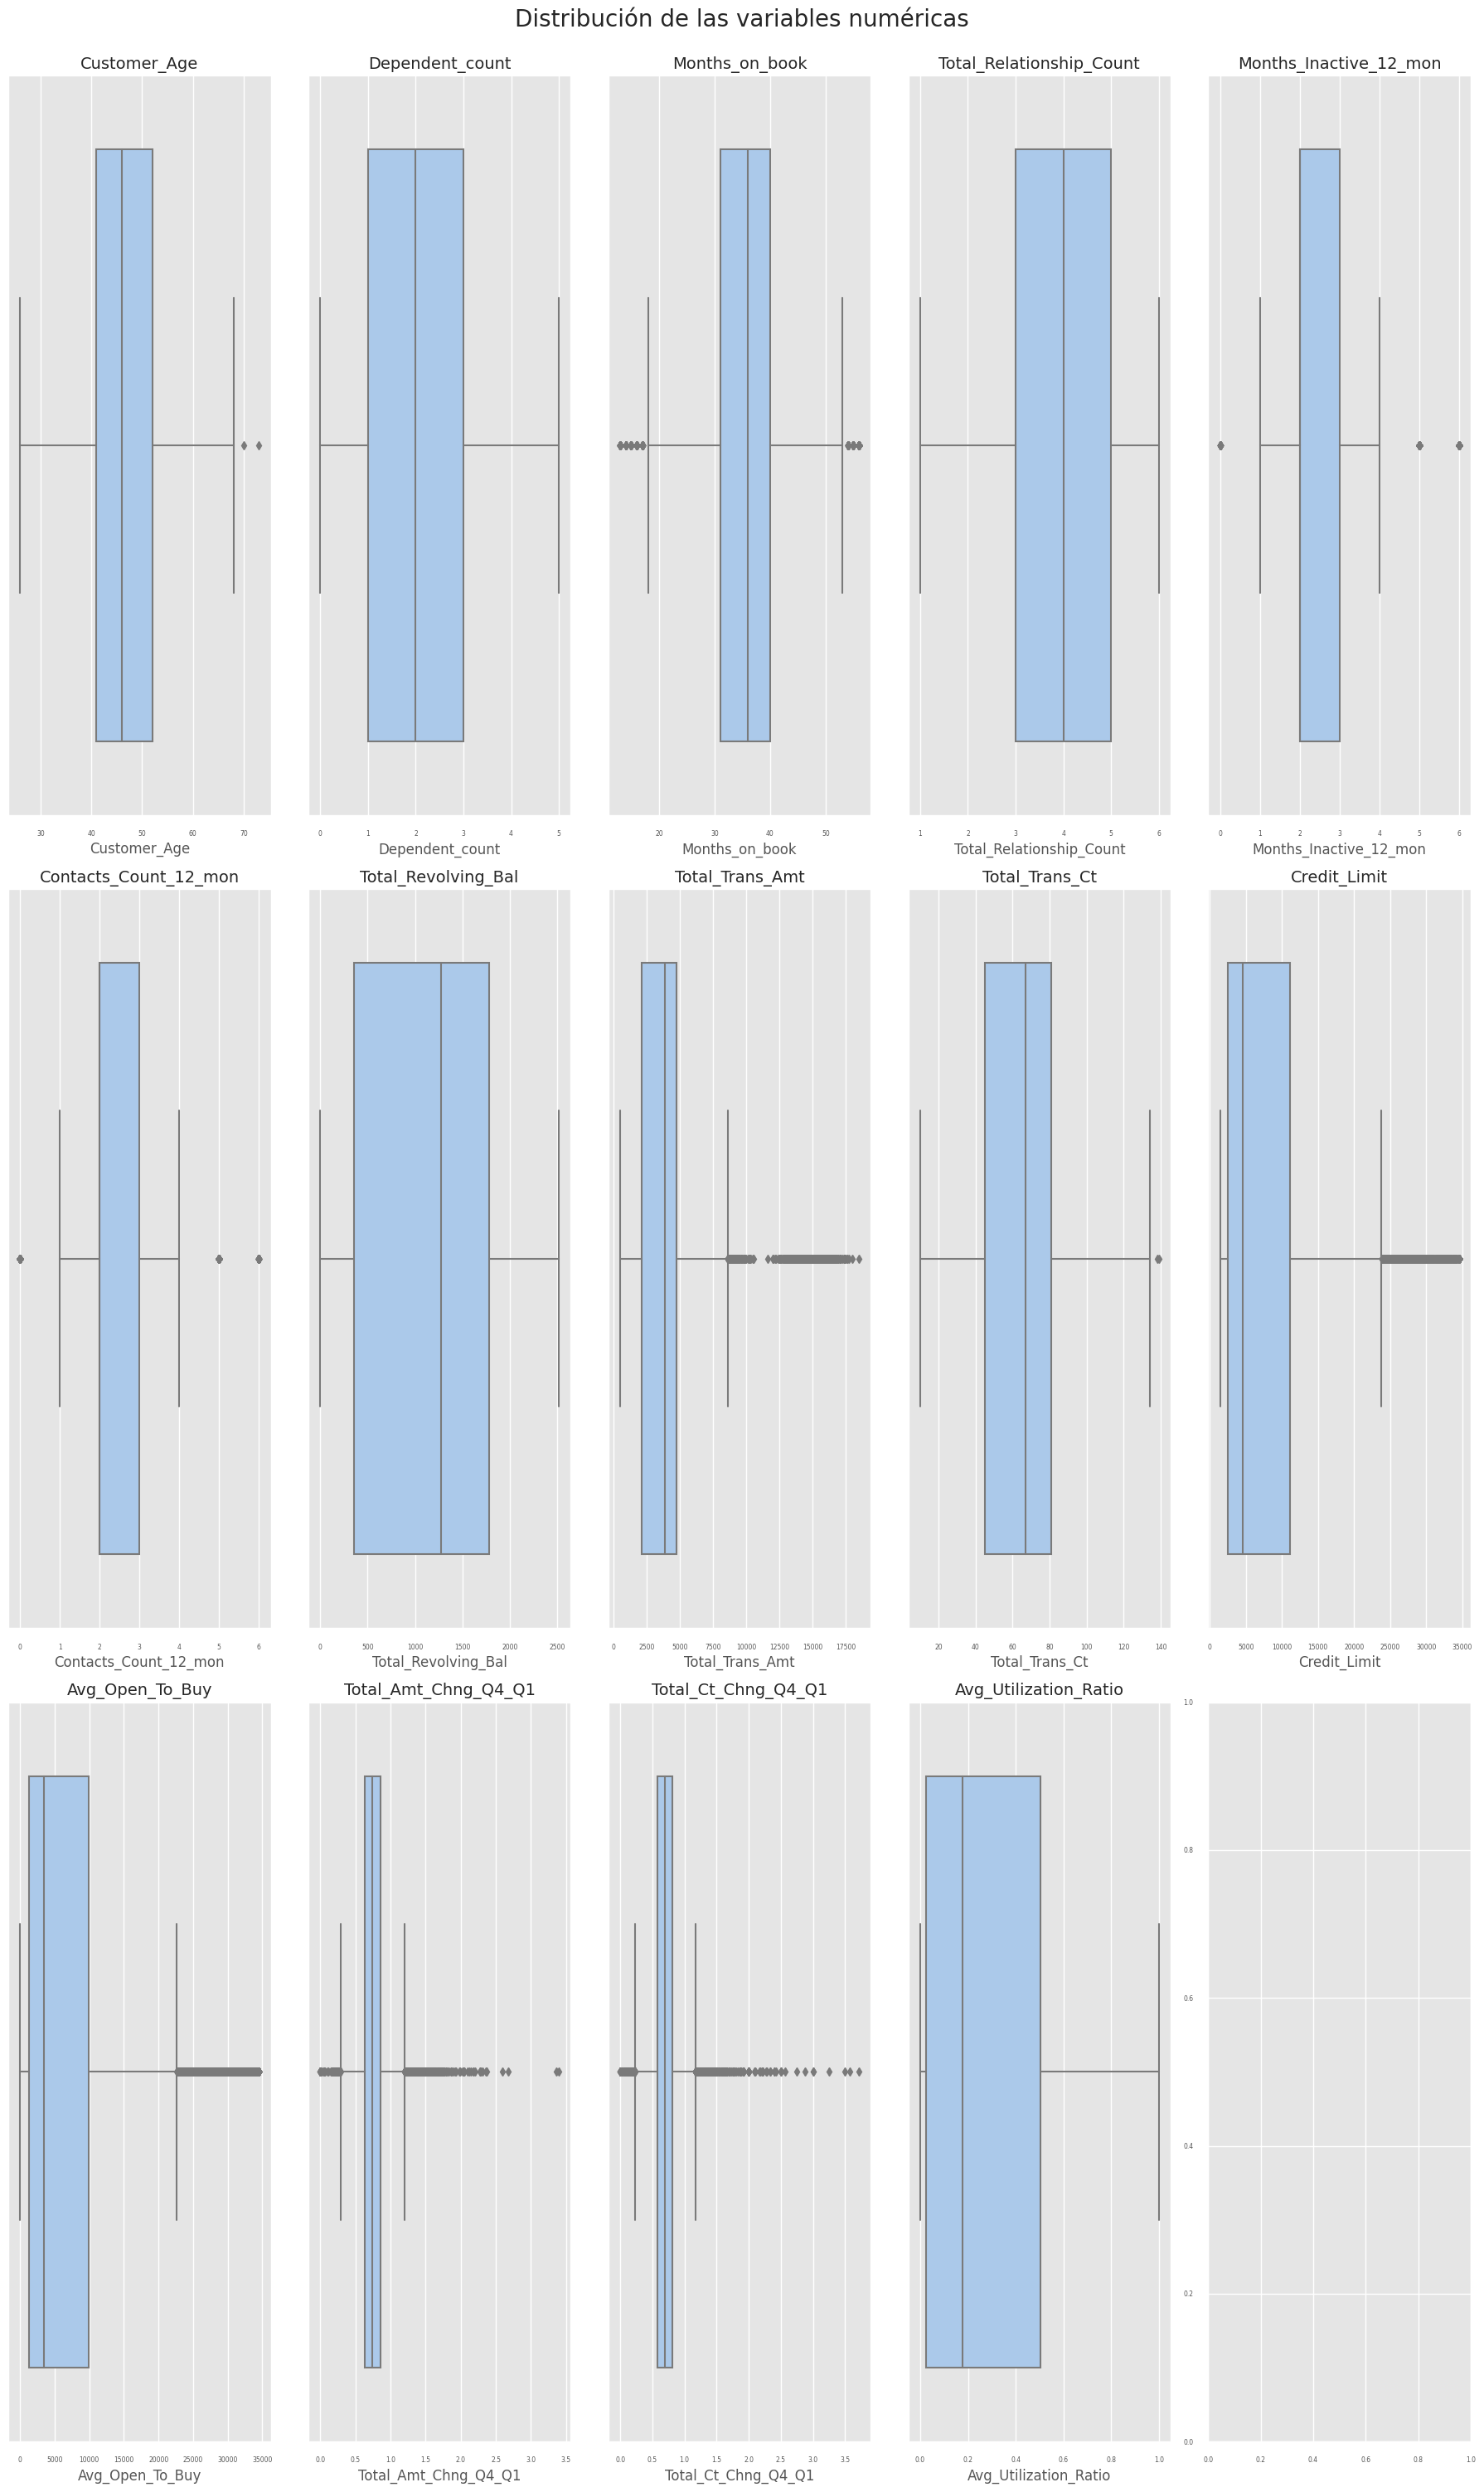

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(18, 30))
fig.suptitle('Distribución de las variables numéricas', fontsize=20, y=1.0)

# Variables numéricas
num_cols = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
'Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct',
'Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
for i, col in enumerate(num_cols):
    row = i // 5
    pos = i % 5
    if row<6:
        sns.boxplot(x=col, data=data_clean, ax=axs[row][pos], palette='pastel')
        axs[row][pos].set_title(col, fontsize=14)

plt.tight_layout()
plt.show()

### 5.3 Distribución de variables numéricas

Media de Customer_Age: 46.32596030413745
Media de Dependent_count: 2.3462032191172115
Media de Months_on_book: 35.928409203120374
Media de Total_Relationship_Count: 3.8125802310654686
Media de Months_Inactive_12_mon: 2.3411671768539546
Media de Contacts_Count_12_mon: 2.4553174681544387
Media de Total_Revolving_Bal: 1162.8140614199665
Media de Total_Trans_Amt: 4404.086303939963
Media de Total_Trans_Ct: 64.85869457884863
Media de Credit_Limit: 8631.953698034955
Media de Avg_Open_To_Buy: 7469.139636614989
Media de Total_Amt_Chng_Q4_Q1: 0.7599406536980349
Media de Total_Ct_Chng_Q4_Q1: 0.7122223758269972
Media de Avg_Utilization_Ratio: 0.2748935518909845


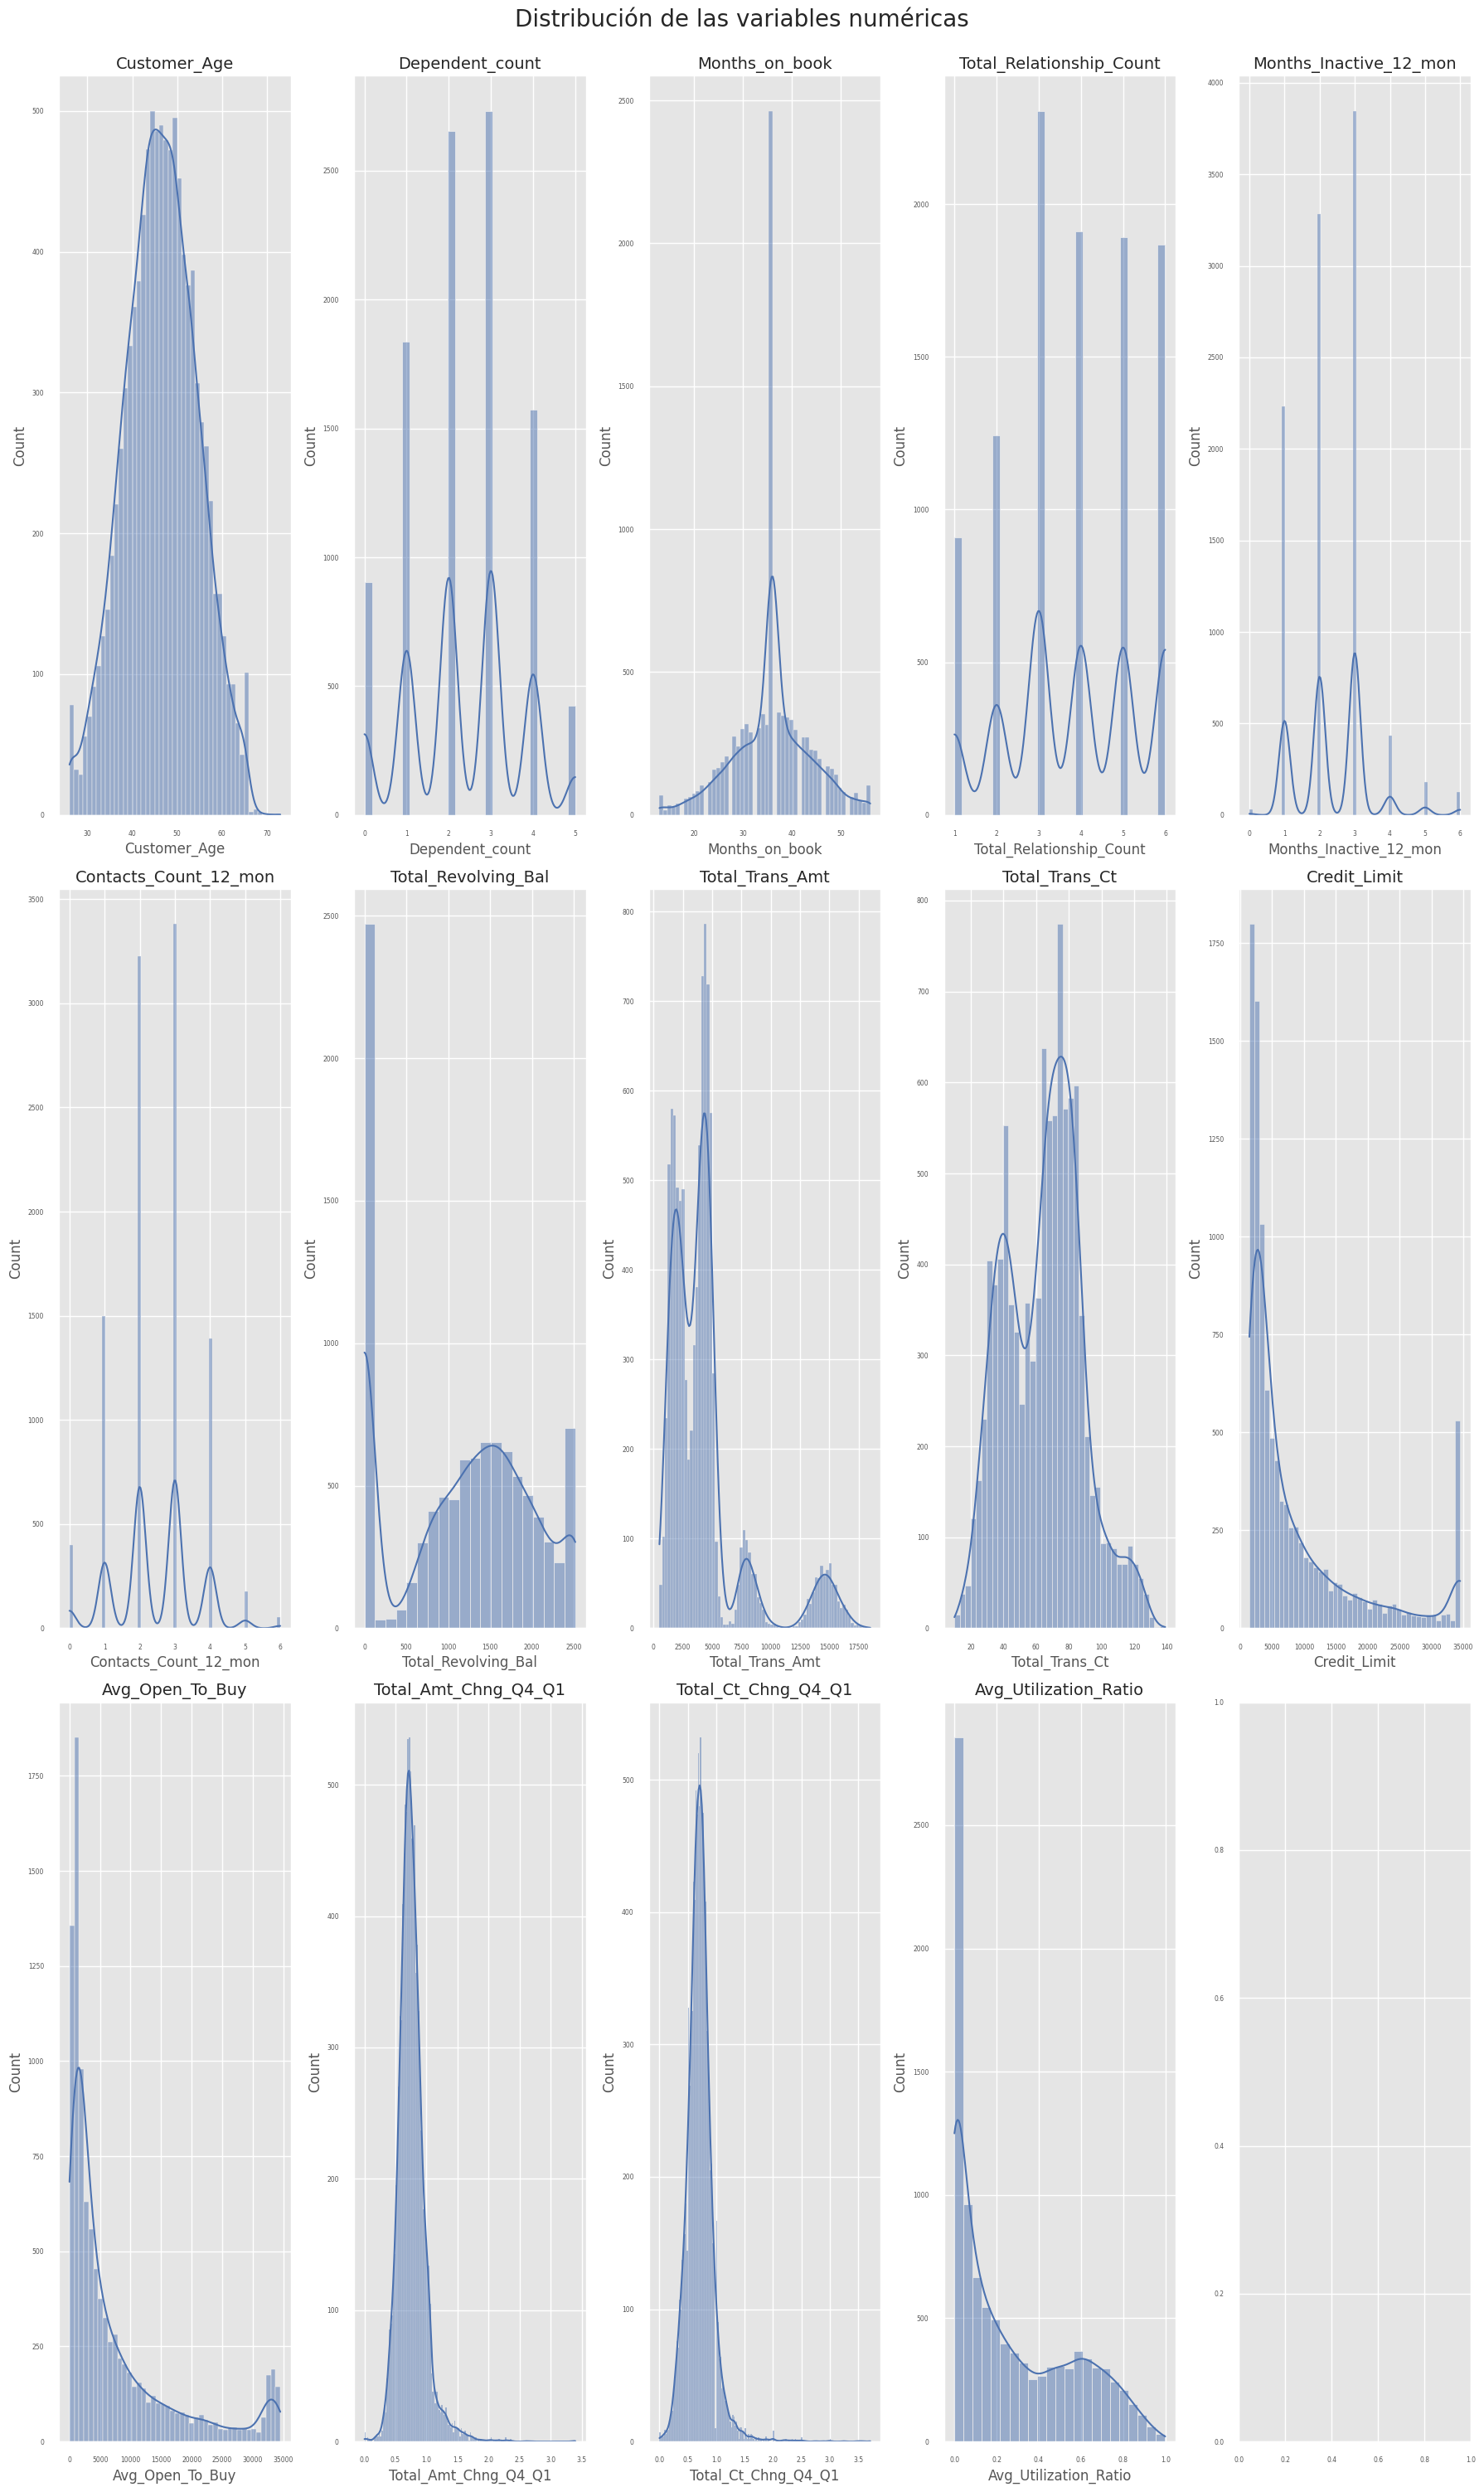

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(18, 30))
fig.suptitle('Distribución de las variables numéricas', fontsize=20, y=1.0)

# Variables numéricas
num_cols = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
'Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct',
'Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
for i, col in enumerate(num_cols):
    row = i // 5
    pos = i % 5
    if row<6:
        sns.histplot(x=col, data=data_clean, ax=axs[row][pos], kde=True)
        axs[row][pos].set_title(col, fontsize=14)
        print(f'Media de {col}: {data_clean[col].mean()}')
plt.tight_layout()
plt.show()

In [ ]:
data_clean['log_total_amt_chng_q4_q1'] = np.log10(data_clean['Total_Amt_Chng_Q4_Q1'])
data_clean['log_total_ct_chng_q4_q1'] = np.log10(data_clean['Total_Ct_Chng_Q4_Q1'])


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log10



<Axes: xlabel='log_total_amt_chng_q4_q1', ylabel='Count'>

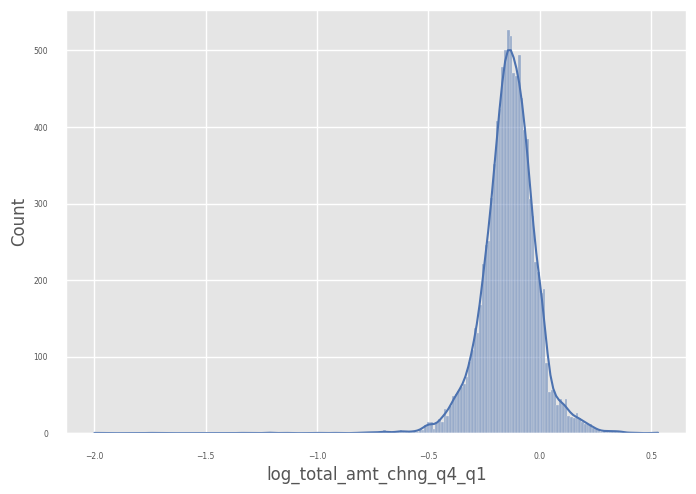

In [ ]:
sns.histplot(x='log_total_amt_chng_q4_q1', data=data_clean, kde=True)

<Axes: xlabel='log_total_ct_chng_q4_q1', ylabel='Count'>

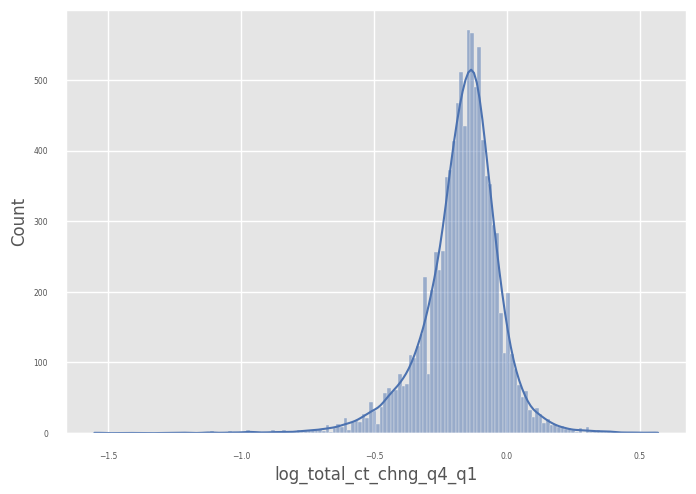

In [ ]:
sns.histplot(x='log_total_ct_chng_q4_q1', data=data_clean, kde=True)

In [ ]:
num_cols = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
'Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct',
'Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','log_total_amt_chng_q4_q1','log_total_ct_chng_q4_q1','Avg_Utilization_Ratio']


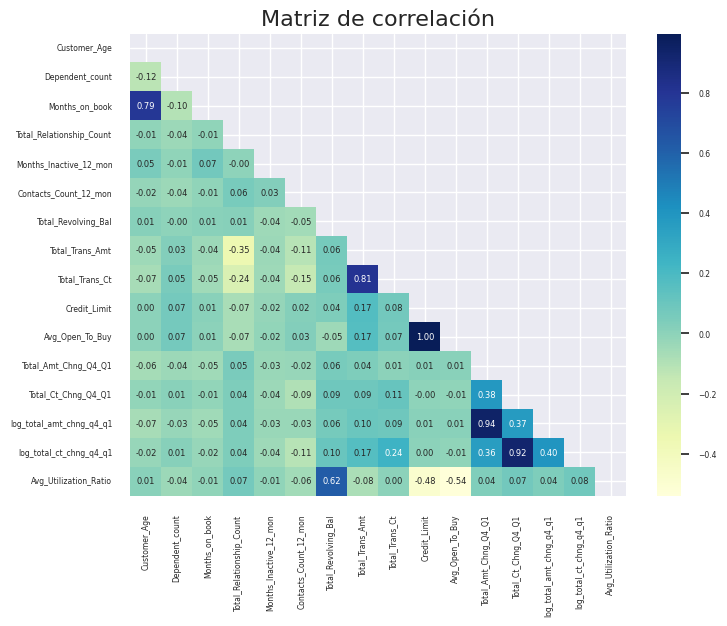

In [ ]:
# Correlación entre variables numéricas
corr_matrix = data_clean[num_cols].corr()
# Obtener la matriz triangular inferior
# creating mask
mask = np.triu(np.ones_like(corr_matrix))
# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))
sns.set(font_scale=0.5)
# Generar el heatmap usando seaborn
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="YlGnBu")
#sns.heatmap(corr_matrix, annot=True)
plt.title('Matriz de correlación', fontsize=16)
plt.show()

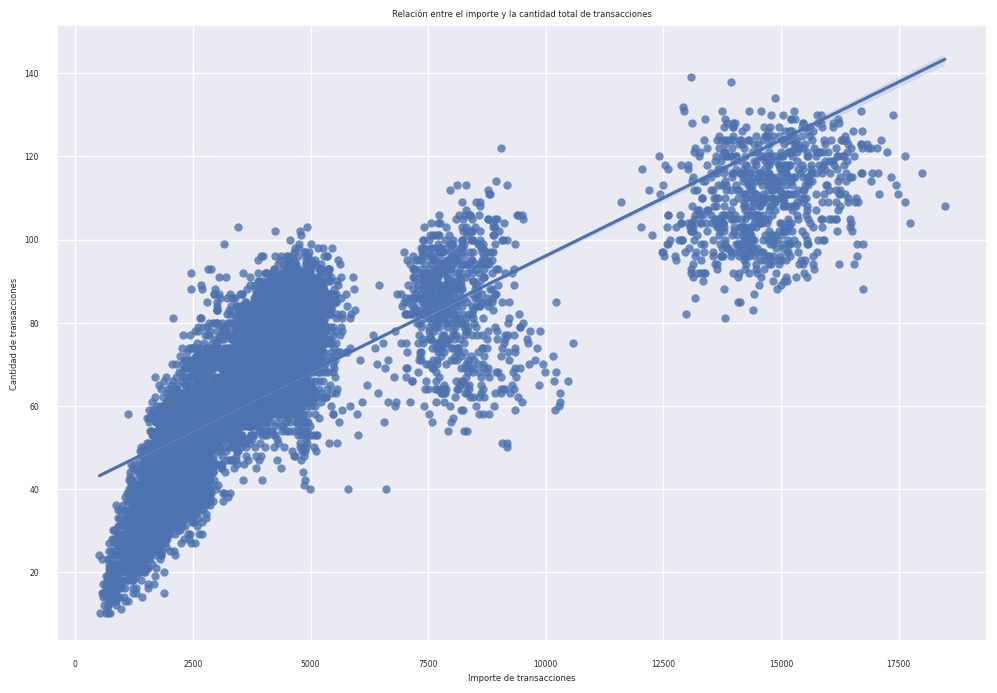

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(x='Total_Trans_Amt',y='Total_Trans_Ct',data=data_clean)
plt.title('Relación entre el importe y la cantidad total de transacciones')
plt.xlabel('Importe de transacciones')
plt.ylabel('Cantidad de transacciones')
plt.show()

Se ve que se tiene algunos grupos subyacentes en nuestros datos; puede ser un experimento interesante intentar agrupar los diferentes grupos y ver las similitudes entre ellos y lo que describe mejor los diferentes grupos.

### 5.4 Relación entre las variables numéricas y la tasa de abandono

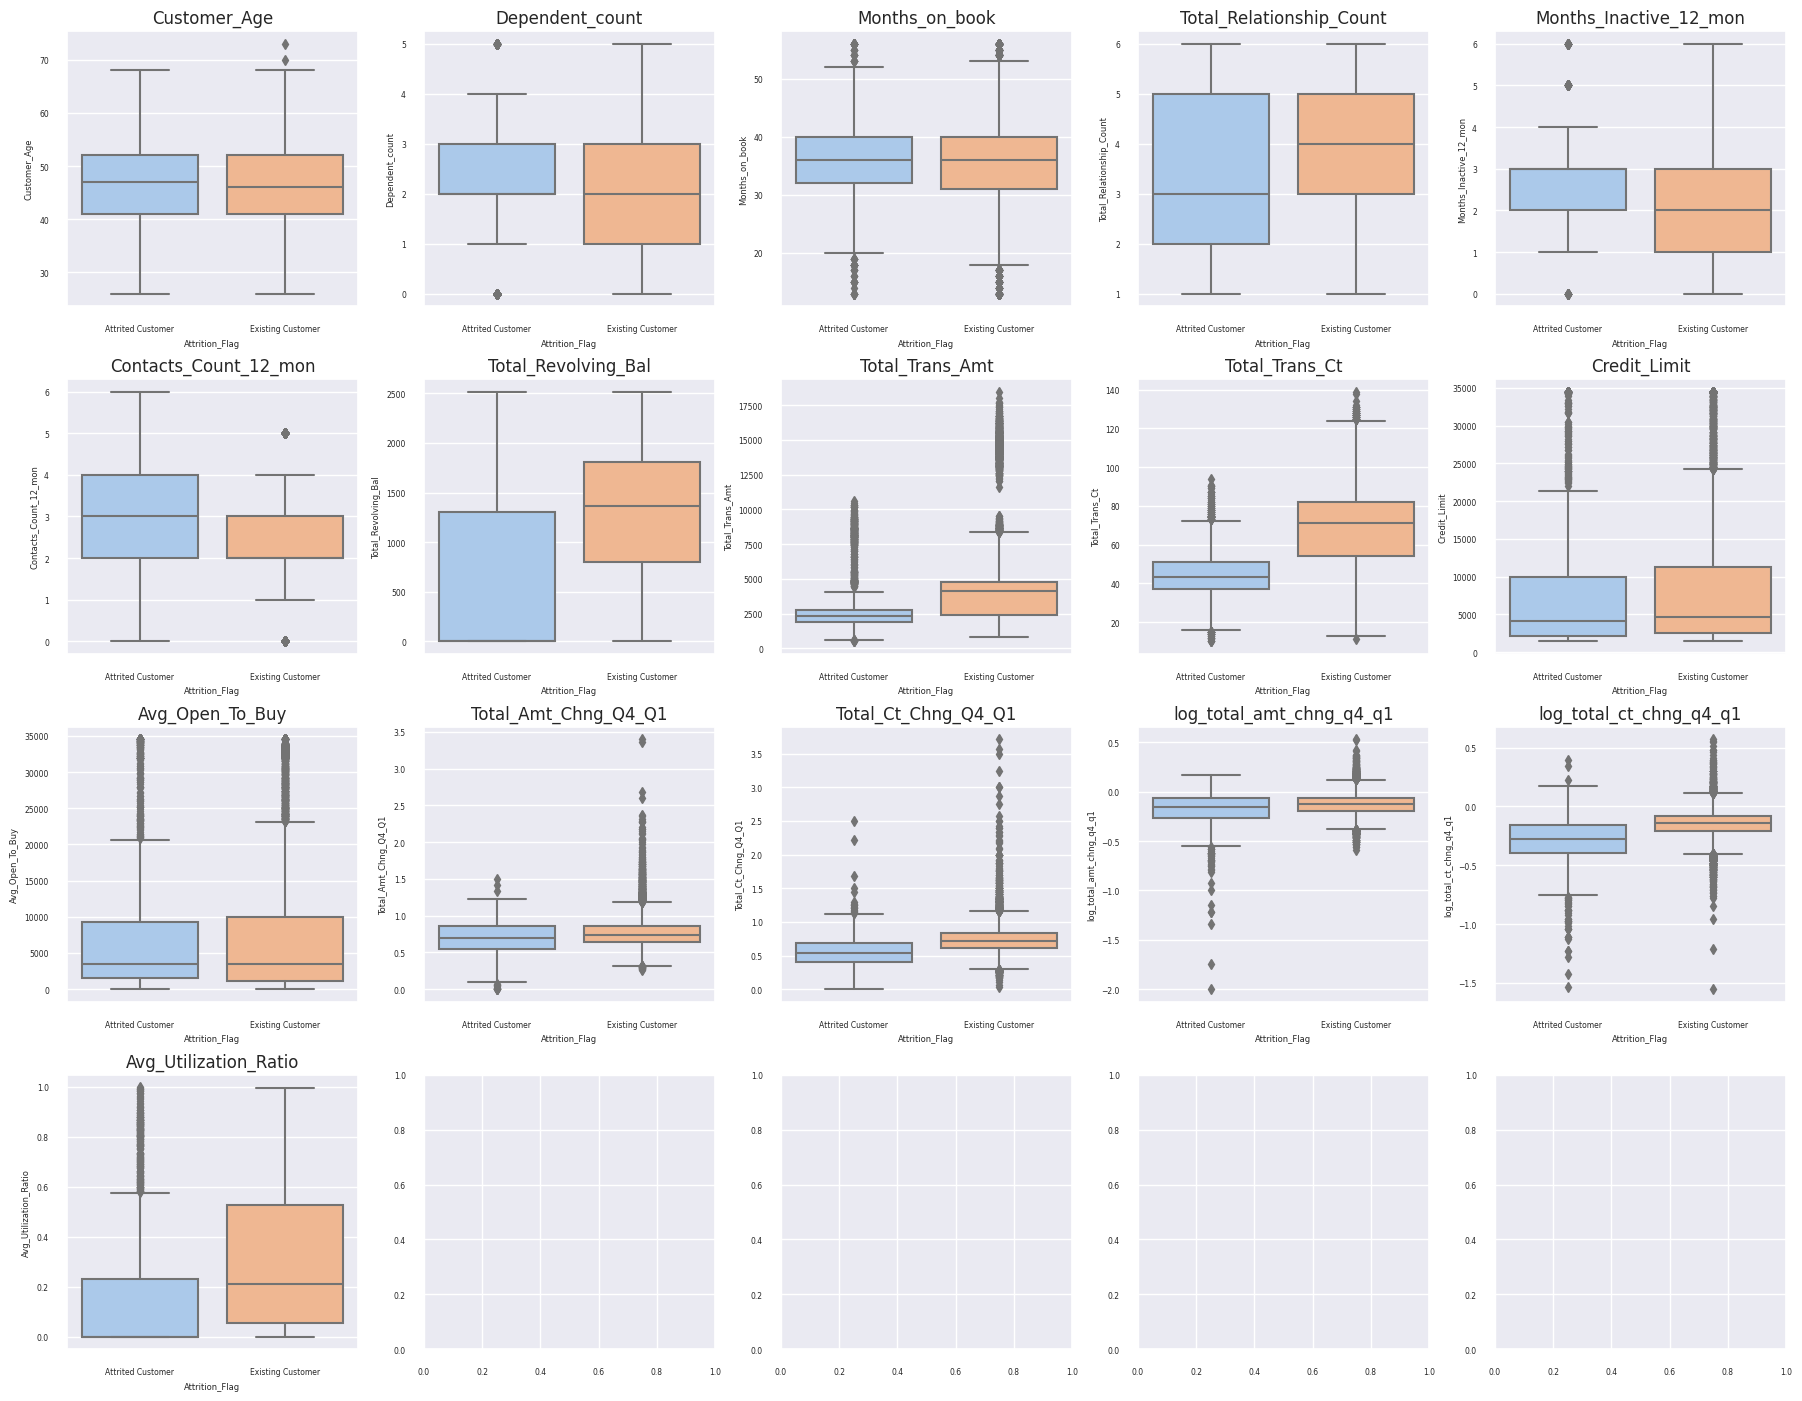

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(18, 14))
#fig.suptitle('Relación entre variables numéricas y tasa de abandono', fontsize=16)

for i, col in enumerate(num_cols):
    row = i // 5
    pos = i % 5
    if row<6:
        sns.boxplot(x='Attrition_Flag', y=col, data=data_clean, ax=axs[row][pos], palette='pastel')
        axs[row][pos].set_title(col, fontsize=12)
        axs[row][pos].legend(loc='upper right')

plt.tight_layout()
plt.show()

### 5.5 Distribución de variables categóricas

In [ ]:
#Seleccionamos las variables categóricas
for col in data_clean.select_dtypes('category').columns.to_list():
    print(col)


Attrition_Flag
Gender
Education_Level
Marital_Status
Income_Category
Card_Category
Customer_Age_period
Months_on_book_Period


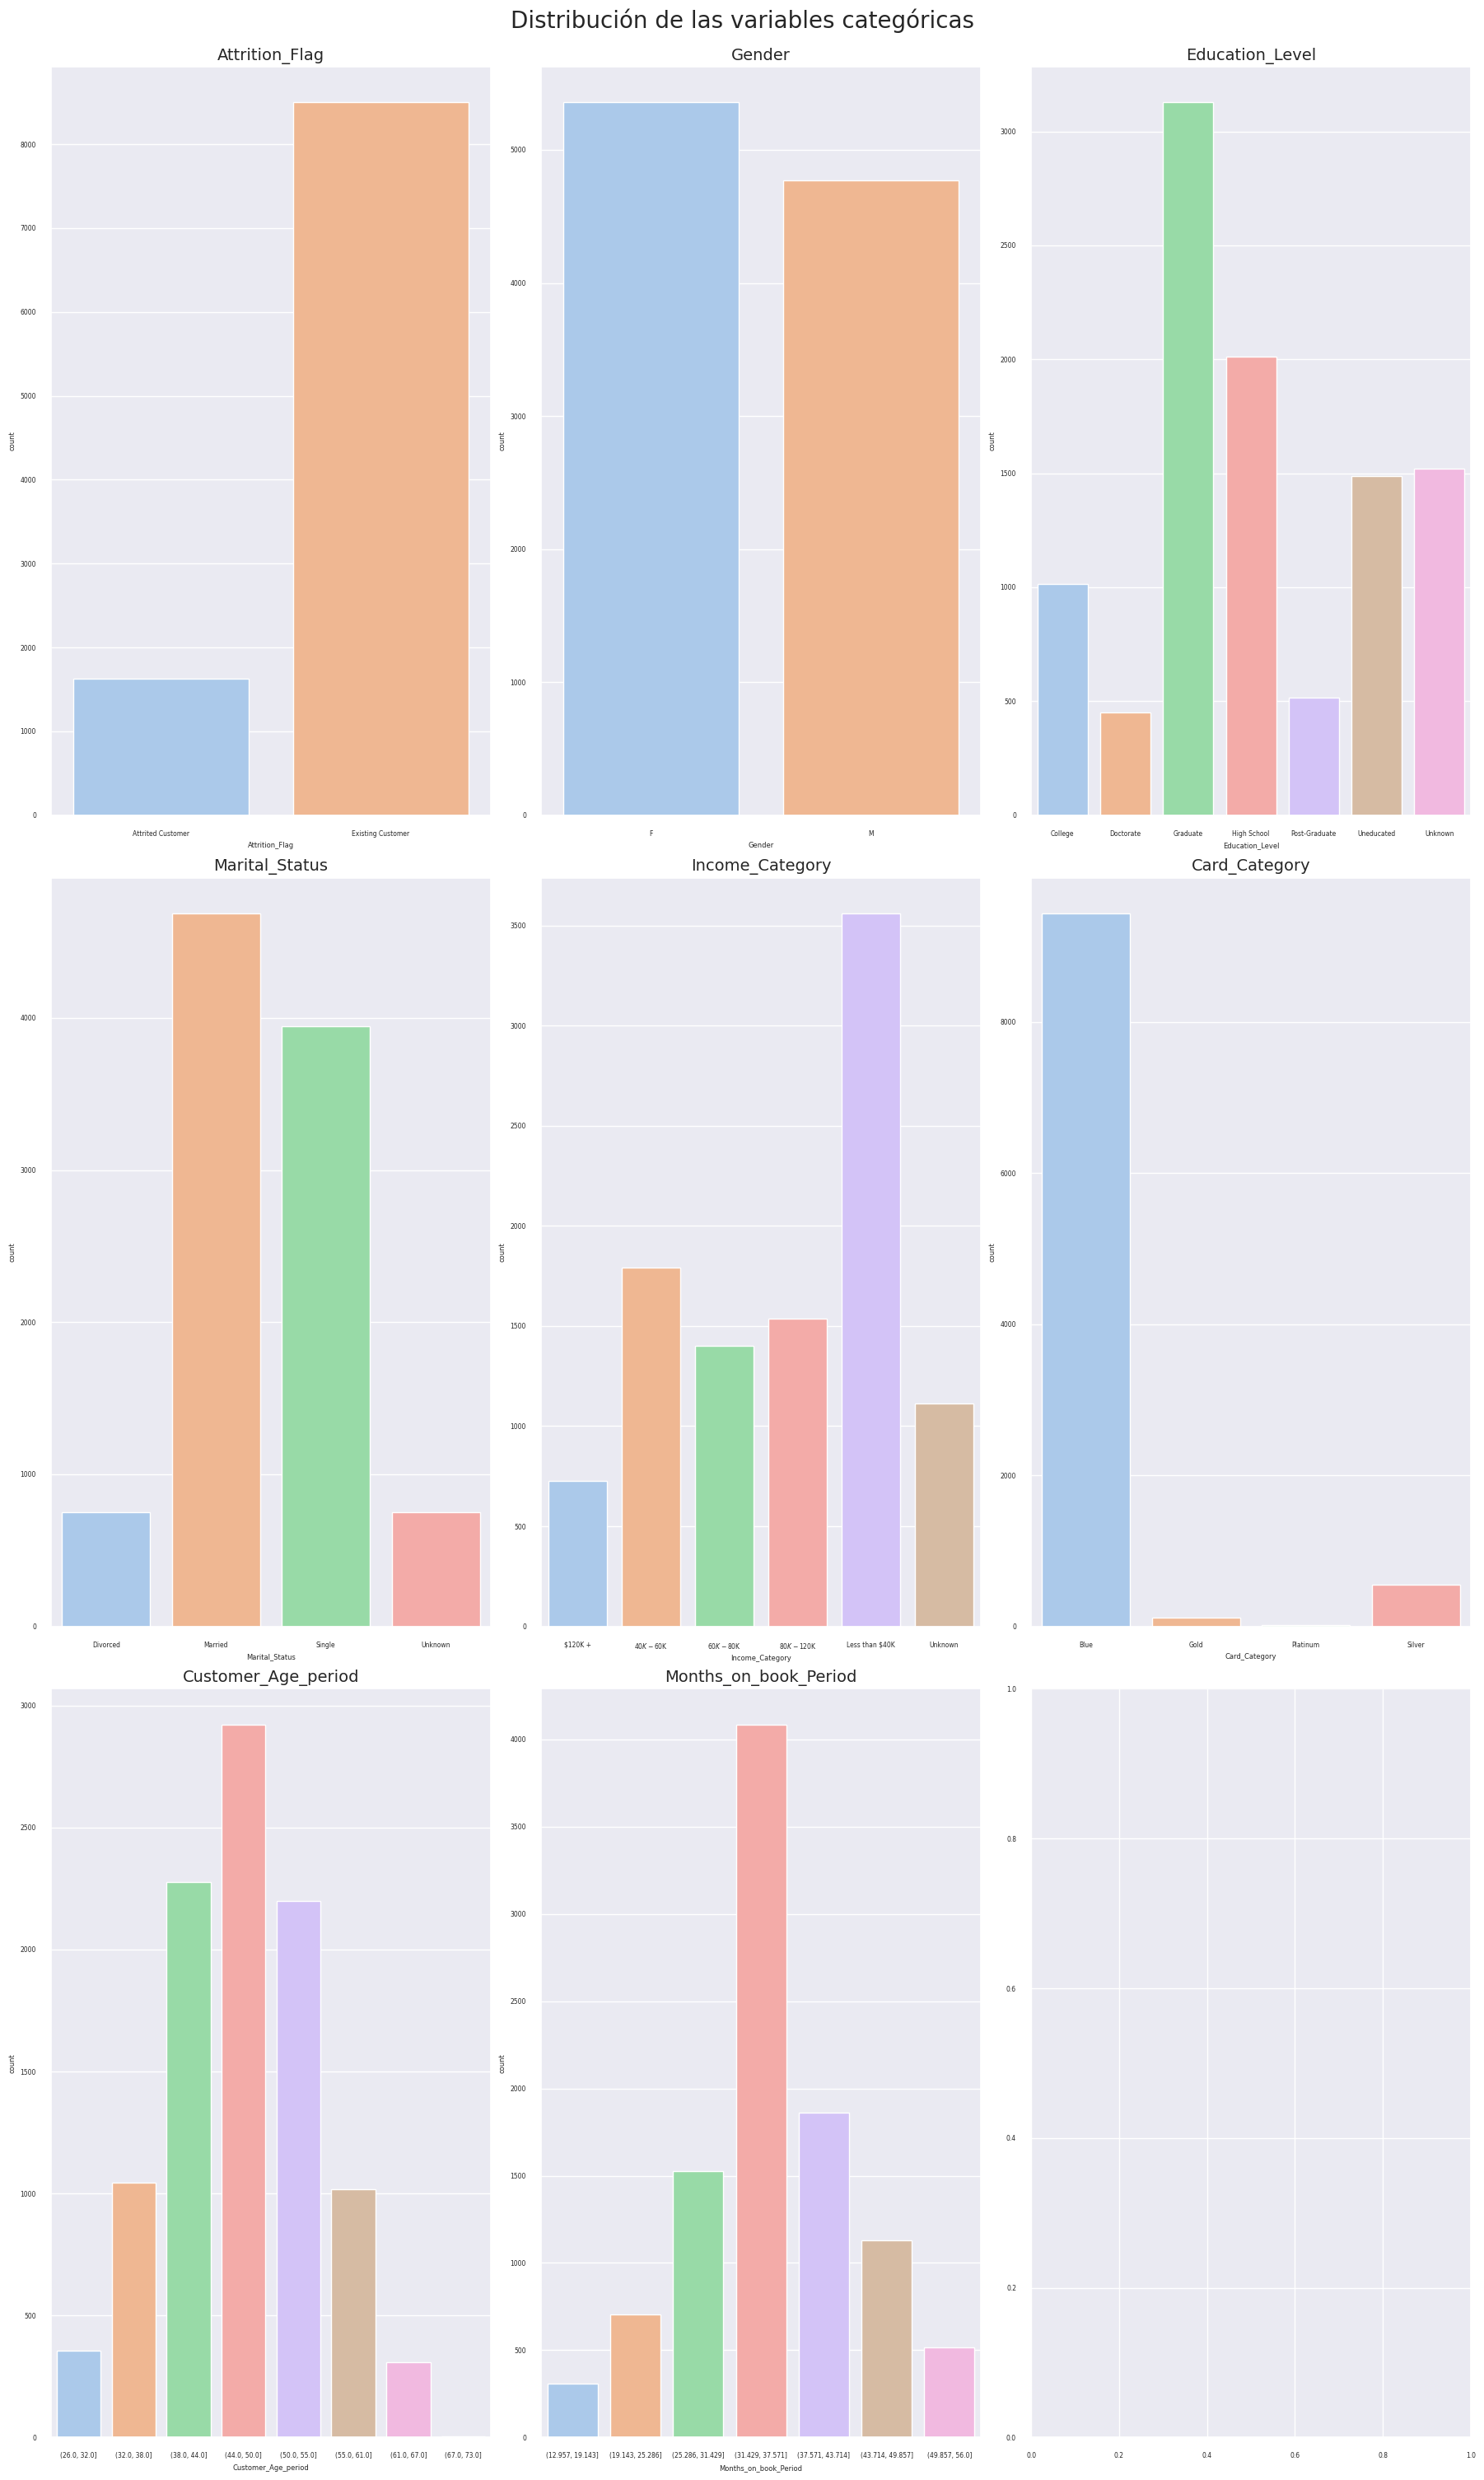

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 30))
fig.suptitle('Distribución de las variables categóricas', fontsize=20, y=1.0)

# Variables categóricas
cat_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Customer_Age_period','Months_on_book_Period']
for i, col in enumerate(cat_cols):
    row = i // 3
    pos = i % 3
    if row<6:
        sns.countplot(x=col, data=data_clean, ax=axs[row][pos], palette='pastel')
        axs[row][pos].set_title(col, fontsize=14)

plt.tight_layout()
plt.show()

### 5.6 Relación entre las variables categóricas y la tasa de abandono

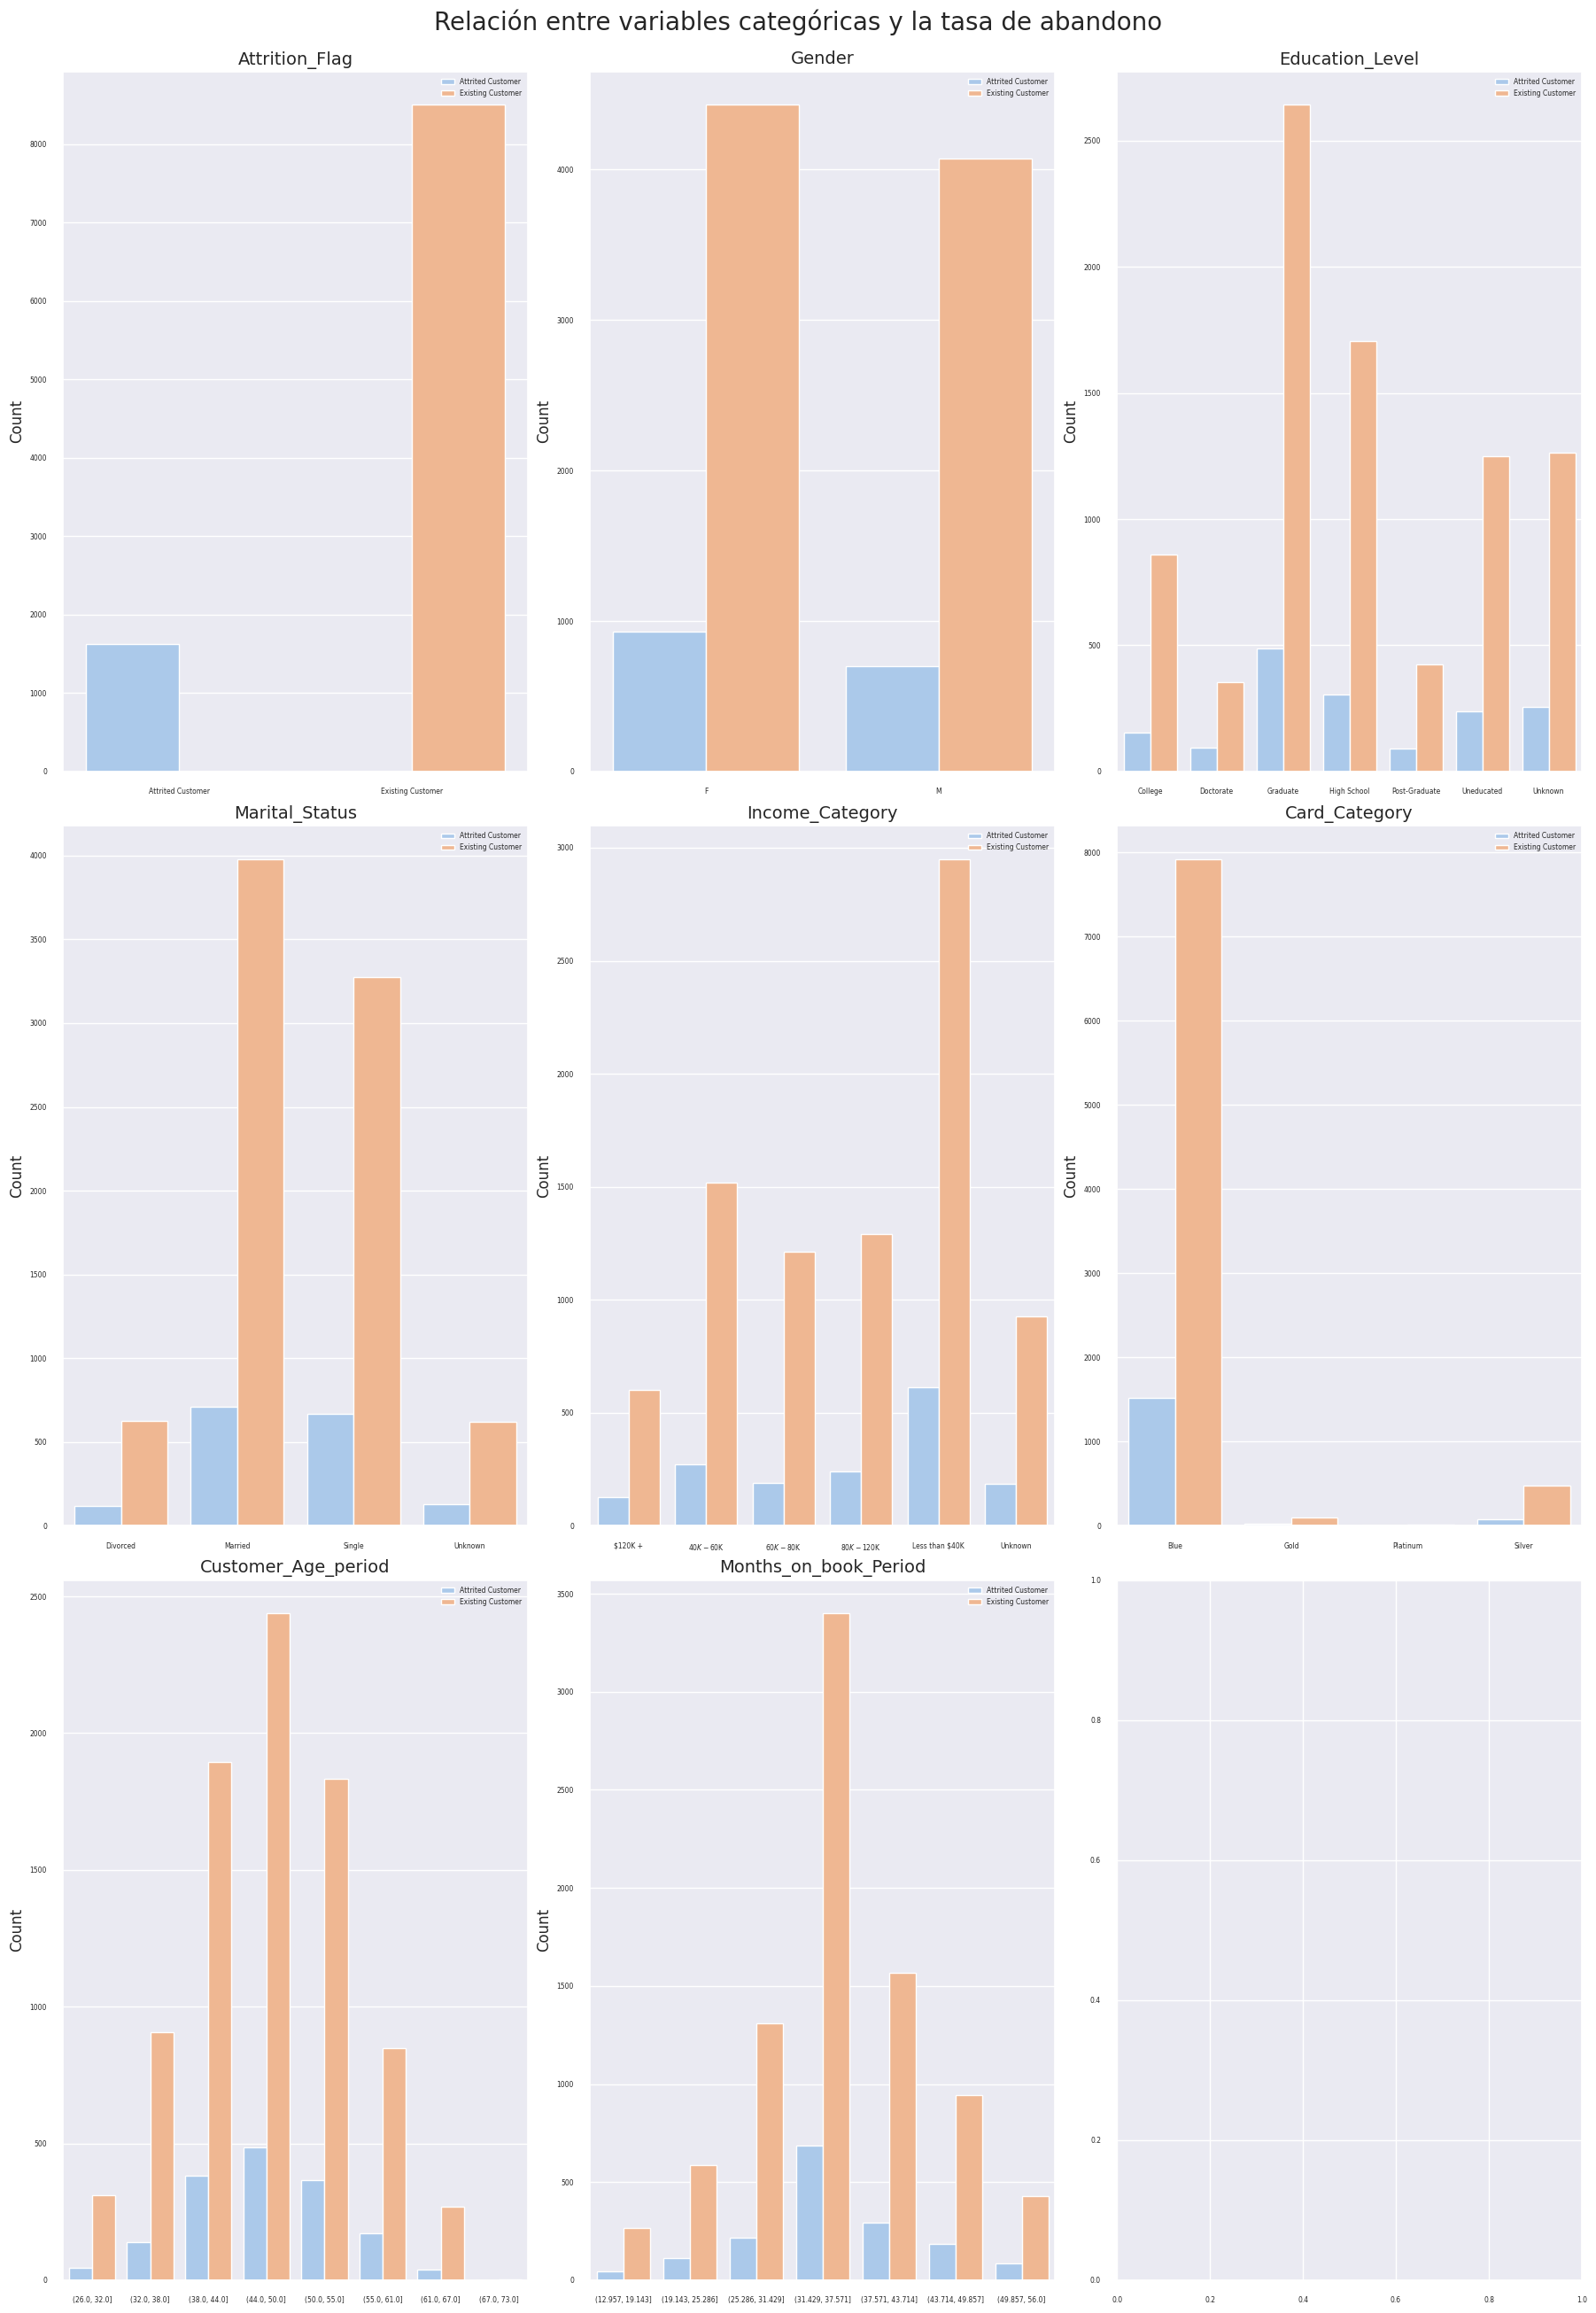

In [ ]:
df_cat = data_clean[cat_cols]

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 26))
fig.suptitle('Relación entre variables categóricas y la tasa de abandono', fontsize=20, y=1.0)

for i, col in enumerate(cat_cols):
    row = i // 3
    pos = i % 3
    sns.countplot(x=col, hue='Attrition_Flag', data=df_cat, ax=axs[row][pos], palette='pastel')
    axs[row][pos].set_title(col, fontsize=14)
    axs[row][pos].set_xlabel('')
    axs[row][pos].set_ylabel('Count', fontsize=12)
    axs[row][pos].legend(loc='upper right')

plt.tight_layout()
plt.show()

### 5.7 Tasa de abandono

In [ ]:
total_customers = data_clean.shape[0]
Attrited_customers = data_clean[data_clean['Attrition_Flag'] == 'Attrited Customer'].shape[0]
Attrited_rate = Attrited_customers / total_customers
print('Tasa de abandono: {:.2%}'.format(Attrited_rate))

Tasa de abandono: 16.07%


### 5.8 Análisis sobre las preguntas de investigación

Luego de analizar los datos, se puede ver que una porporción muy pequeña de las muestras de datos representan a clientes que abandonan. Este caso hay que tener cuidado, ya que la variable target está desbalanceada. Debemos considerar alguna metodología para salvar dicho problema.
Además se observa que hay factores que influyen en la tasa de abandono del cliente. Por ejemplo, se identificó que quienen abandonan realizan transacciones de mucho menos monto que los clientes existentes, las cantidad de las mismas también es menor que la de los clientes existentes. Es aquí que uno podría pensar que realiza los clientes que abandona utilizan menos sus tarjetas, y por ende se podría pensar que también utilizan menos su línea de crédito.


***Pregunta: ¿Los clientes que realizan menos transacciones tienen más probabilidades de darse de baja?***

En esta hipótesis se analiza si los clientes que realizan menos transacciones tienen más probabilidades de darse de baja. En primer lugar, veamos los niveles generales de transacciones.

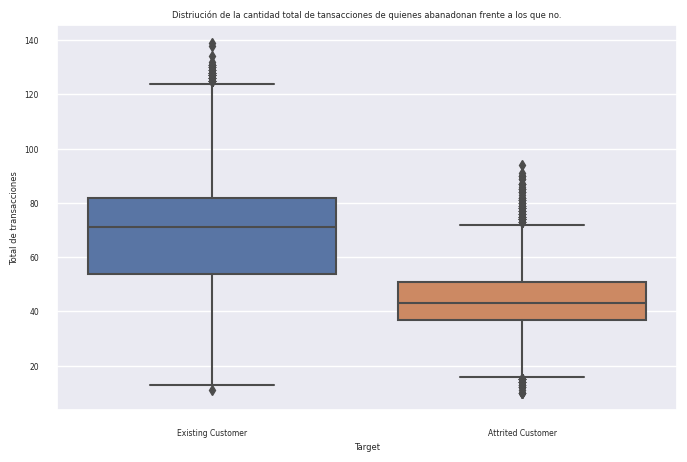

In [ ]:
fig, px = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df_final, y='Total_Trans_Ct', x='Attrition_Flag')
px.set_title('Distriución de la cantidad total de tansacciones de quienes abanadonan frente a los que no.')
px.set_xlabel('Target')
px.set_ylabel('Total de transacciones')

plt.show;

A partir del análisis del boxplot se considera que existe una diferencia real entre la cantidad promedio de transacciones de clientes activos y la de clientes no activos.

Se puede observar que quienen abandonan realizan muchas menos transacciones que los clientes existentes. Pero, ¿se debe a una disminución de las transacciones o siempre han realizado menos transacciones?

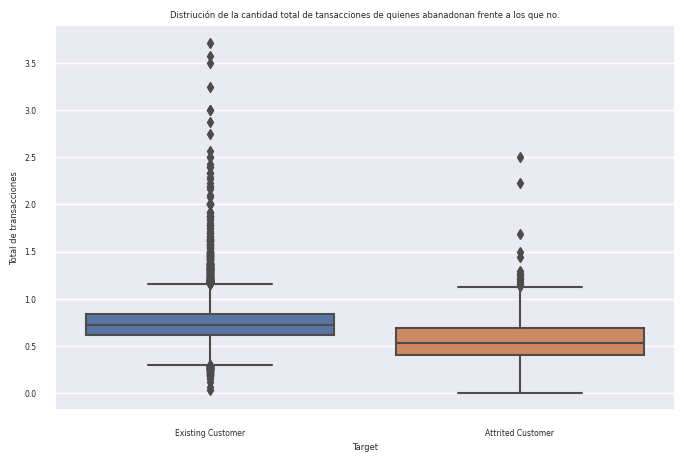

In [ ]:
fig, px = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df_final, y='Total_Ct_Chng_Q4_Q1', x='Attrition_Flag')
px.set_title('Distriución de la cantidad total de tansacciones de quienes abanadonan frente a los que no.')
px.set_xlabel('Target')
px.set_ylabel('Total de transacciones')

plt.show;

Aquí se puede considerar que existe una diferencia real entre el promedio del cambio de la cantidad de transacciones de los clientes activos y el de no activos.

***Pregunta: ¿Los clientes que se dan de baja utilizarán menos su línea de crédito?***

Teniendo en cuenta lo que hemos visto en los datos transaccionales, nuestra siguiente hipótesis es que los clientes que se dan de baja tienen una menor utilización. Esto significa que utilizan menos su línea de crédito con el banco. Lo primero que se quiere que comprobar es si se le da a estos clientes una línea de crédito similar

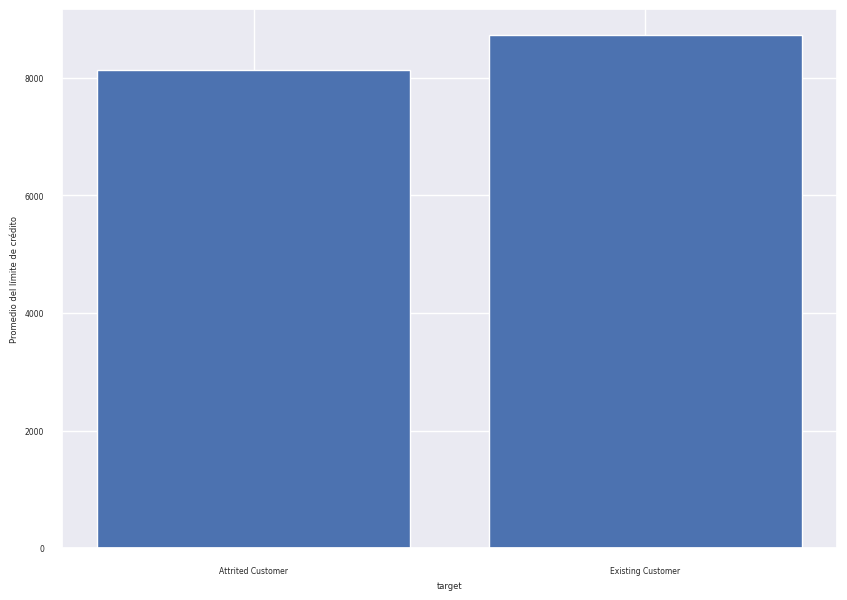

In [ ]:
dfline = df_final.groupby('Attrition_Flag').agg({'Credit_Limit':'mean'})


#Build the bar chart
# Figure Size
fig= plt.figure(figsize =(10, 7))

plt.bar(dfline.index,dfline['Credit_Limit'])
# Configurar las etiquetas y el título del gráfico
plt.xlabel('target')
plt.ylabel('Promedio del límite de crédito')
#plt.title("Promedio del crédito de línea")

# Show Plot
plt.show()



No parece que se le ofrezca una línea más baja a los clientes dados de baja, así que ahora se analiza si utilizan menos su línea.

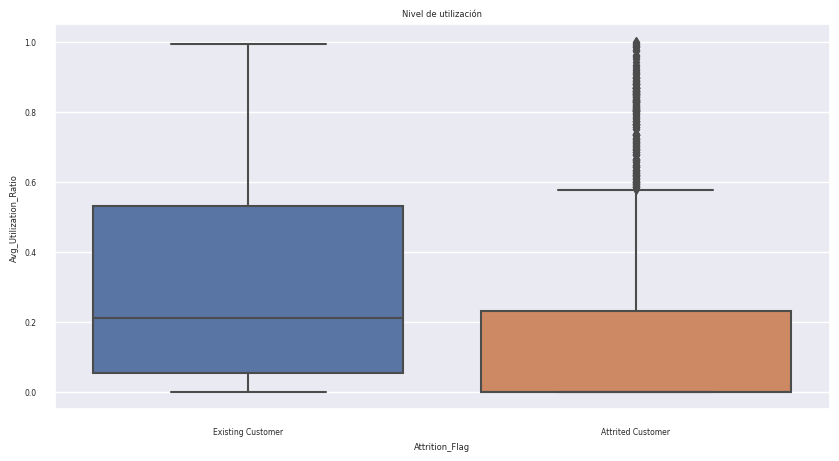

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_final, x="Attrition_Flag", y="Avg_Utilization_Ratio")
plt.title('Nivel de utilización')
plt.show;

Podemos ver claramente que la distribución de quienes abandonan está sesgada al 0% de utilización, es decir, que no utilizan su tarjeta en absoluto.

***Pregunta: ¿El cliente que abandona ha estado inactivo durante más tiempo que los clientes que permanecen?***

Dado que la base de bajas utiliza menos la tarjeta, ¿tienen un periodo de inactividad prolongado

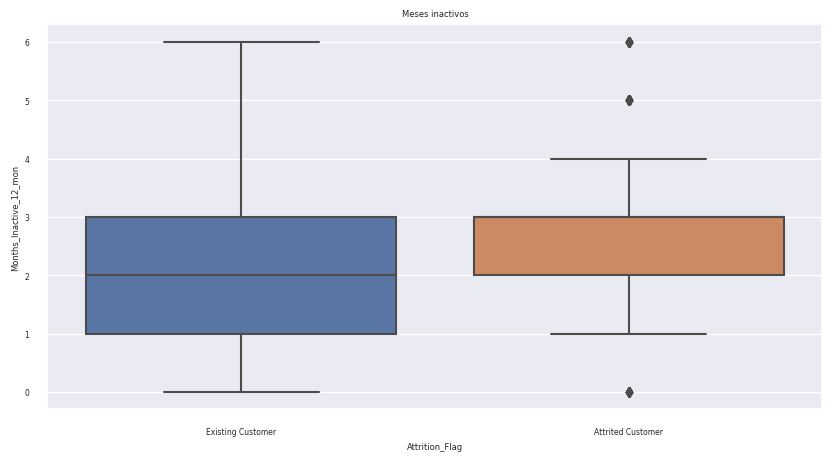

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_final, x="Attrition_Flag", y="Months_Inactive_12_mon")
plt.title('Meses inactivos')
plt.show;

Parece que los que abandonan tienen un mayor número de meses inactivos que los clientes que se quedan. Los datos están menos distribuidos que los clientes que se quedan.

In [ ]:
data_clean.drop(columns=['Customer_Age','Months_on_book','Credit_Limit','Avg_Open_To_Buy','log_total_amt_chng_q4_q1','log_total_ct_chng_q4_q1'],inplace=True)

## 6. Pre - procesamiento (Parte II)

### 6.1 Variable dummy

In [ ]:
code = {'Existing Customer':0, 'Attrited Customer':1}
data_clean['Attrition_Flag'] = data_clean['Attrition_Flag'].map(code)

y = data_clean['Attrition_Flag']
X = data_clean.drop('Attrition_Flag',errors='ignore',axis=1)

### 6.2 Normalización de variables numéricas

In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64'])

# Crear objeto StandardScaler
ss = StandardScaler()

# Estandarizar features
df_std = ss.fit_transform(num_cols)
df_std = pd.DataFrame(df_std, columns=num_cols.columns)
df_no_std = X.select_dtypes(exclude=['int64', 'float64'])

# Resetear índices
df_std = df_std.reset_index(drop=True)
df_no_std = df_no_std.reset_index(drop=True)

# Unir con dataframe original
X = pd.concat([df_std, df_no_std], axis=1)

X

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age_period,Months_on_book_Period
0,0.503368,0.763943,-1.327136,0.492404,-0.473422,2.623494,-0.959707,-0.973895,3.834003,-0.775882,M,High School,Married,$60K - $80K,Blue,"(44.0, 50.0]","(37.571, 43.714]"
1,2.043199,1.407306,-1.327136,-0.411616,-0.366667,3.563293,-0.916433,-1.357340,12.608573,-0.616276,F,Graduate,Single,Less than $40K,Blue,"(44.0, 50.0]","(43.714, 49.857]"
2,0.503368,0.120579,-1.327136,-2.219655,-1.426858,8.367214,-0.740982,-1.911206,6.807864,-0.997155,M,Graduate,Married,$80K - $120K,Blue,"(50.0, 55.0]","(31.429, 37.571]"
3,1.273283,-0.522785,1.641478,-1.315636,1.661686,2.942843,-0.951758,-1.911206,6.807864,1.759686,F,High School,Unknown,Less than $40K,Blue,"(38.0, 44.0]","(31.429, 37.571]"
4,0.503368,0.763943,-1.327136,-2.219655,-1.426858,6.455682,-1.056263,-1.570365,7.509325,-0.997155,M,Uneducated,Married,$60K - $80K,Blue,"(38.0, 44.0]","(19.143, 25.286]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,-0.266547,-0.522785,-0.337598,0.492404,0.844455,-0.259771,3.259358,2.221481,0.608119,0.678714,M,Graduate,Single,$40K - $60K,Blue,"(50.0, 55.0]","(37.571, 43.714]"
10123,-0.266547,0.120579,-0.337598,0.492404,1.255524,0.201004,1.283475,0.176440,-0.122745,0.856458,M,Unknown,Divorced,$40K - $60K,Blue,"(38.0, 44.0]","(19.143, 25.286]"
10124,-1.036462,0.763943,0.651940,1.396424,-1.426858,0.269436,1.732994,-0.207005,0.444305,-0.997155,F,High School,Married,Less than $40K,Blue,"(44.0, 50.0]","(31.429, 37.571]"
10125,-0.266547,0.120579,0.651940,0.492404,-1.426858,-1.026208,1.174848,-0.121795,0.041070,-0.997155,M,Graduate,Unknown,$40K - $60K,Blue,"(26.0, 32.0]","(31.429, 37.571]"


### 6.3 Label encoding

In [ ]:
# Imprime las categorías por columnas categóricas
for col in X.select_dtypes('category').columns.to_list():
    print(col + ': '+ str(X[col].cat.categories.to_list()))


# https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

features_to_encode = X.select_dtypes('category').columns.to_list()
for feature in features_to_encode:
    X = encode_and_bind(X, feature)

X.info()

Gender: ['F', 'M']
Education_Level: ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown']
Marital_Status: ['Divorced', 'Married', 'Single', 'Unknown']
Income_Category: ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown']
Card_Category: ['Blue', 'Gold', 'Platinum', 'Silver']
Customer_Age_period: [Interval(26.0, 32.0, closed='right'), Interval(32.0, 38.0, closed='right'), Interval(38.0, 44.0, closed='right'), Interval(44.0, 50.0, closed='right'), Interval(50.0, 55.0, closed='right'), Interval(55.0, 61.0, closed='right'), Interval(61.0, 67.0, closed='right'), Interval(67.0, 73.0, closed='right')]
Months_on_book_Period: [Interval(12.957, 19.143, closed='right'), Interval(19.143, 25.286, closed='right'), Interval(25.286, 31.429, closed='right'), Interval(31.429, 37.571, closed='right'), Interval(37.571, 43.714, closed='right'), Interval(43.714, 49.857, closed='right'), Interval(49.857, 56.0, closed='right')]
<class 'p

## 7. Modelado



### 7.1 Smote - Mejorando el desbalanceo

Como vemos un desbalanceo en el dataset se utiliza Smote. Esta técnica de muestreo utilizada para tratar con conjuntos de datos desbalanceados en aprendizaje automático, generando nuevos ejemplos similares a los casos minoritarios para balancear las clases y mejorar la capacidad de clasificación en problemas desbalanceados.

In [ ]:
smote = SMOTE(sampling_strategy='auto')
X_res, y_res = smote.fit_resample(X, y)

In [ ]:
# 1. Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state = 42)
# By using a stratified split, the raito of 1 and 0s are consistent btwn the two splits
print(y_train.value_counts())
print(y_test.value_counts())


0    6824
1    6776
Name: Attrition_Flag, dtype: int64
1    1724
0    1676
Name: Attrition_Flag, dtype: int64


In [ ]:
scaler=StandardScaler()#instantiate
scaler.fit(X_res) # calcula la media y estandar para cada dimension
X_scaled=scaler.transform(X_res)# transforma los datos a su nueva escala

### 7.2 Selección de variables

Como se observó en la matriz de correlación haya algunas variables que son altamente correlacionadas, cual puede producir algún ruido en nuestro modelo. Por ende, es importante hacer una selección de features, como también es importante para evitar el overfitting.

Se utiliza RFECV (Recursive Feature Elimination with Cross Validation) para ir eliminando variables y evaluar el desempeño del Random Forest mediante Validación Cruzada.

Se eligen las variables que optimizan la accuracy.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RFE con validación cruzada
rfe = RFECV(estimator=RandomForestClassifier() , cv=cv)
rfe.fit(X_train, y_train)

# Transformar datos
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

print("Número óptimo de features: %d" % rfe.n_features_)

# Features seleccionadas
selected_features_RFECV = X_train.columns[rfe.support_]

print("Features seleccionadas: ")
print(selected_features_RFECV)

Número óptimo de features: 27
Features seleccionadas: 
Index(['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Gender_F', 'Gender_M',
       'Education_Level_College', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Uneducated',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_Less than $40K', 'Customer_Age_period_(26.0, 32.0]',
       'Customer_Age_period_(32.0, 38.0]', 'Customer_Age_period_(38.0, 44.0]',
       'Customer_Age_period_(44.0, 50.0]', 'Customer_Age_period_(50.0, 55.0]',
       'Months_on_book_Period_(31.429, 37.571]'],
      dtype='object')


### 7.3 Entrenamiento y evaluación de modelos

Los modelos elegidos fueron XGBoosting, Máquinas de Vectores de Soporte (SVM) y Multi Layer Perceptron

In [ ]:
# Modelo XGBoost
xgb = XGBClassifier()
xgb.fit(X_train_rfe, y_train)
y_pred_xgb = xgb.predict(X_test_rfe)

# Matriz de confusión y clasificación para XGBoost
print('XGBoost')
print(confusion_matrix(y_train, xgb.predict(X_train_rfe)))
print(classification_report(y_train, xgb.predict(X_train_rfe)))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

print('-----------------------------------------------')
# Modelo SVM
svm = SVC()
svm.fit(X_train_rfe, y_train)
y_pred_svm = svm.predict(X_test_rfe)
# Matriz de confusión y clasificación para SVM
print('SVM')
print(confusion_matrix(y_train, svm.predict(X_train_rfe)))
print(classification_report(y_train, svm.predict(X_train_rfe)))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

print('-----------------------------------------------')
# Modelo MPL
mlp = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', solver='adam', random_state=1, max_iter = 1000)
mlp.fit(X_train_rfe, y_train)
y_pred_mlp = mlp.predict(X_test_rfe)

# Matriz de confusión y clasificación para MPL
print('MPL')
print(confusion_matrix(y_train, mlp.predict(X_train_rfe)))
print(classification_report(y_train, mlp.predict(X_train_rfe)))
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

XGBoost
[[6821    3]
 [   0 6776]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6824
           1       1.00      1.00      1.00      6776

    accuracy                           1.00     13600
   macro avg       1.00      1.00      1.00     13600
weighted avg       1.00      1.00      1.00     13600

[[1643   33]
 [  31 1693]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1676
           1       0.98      0.98      0.98      1724

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400

-----------------------------------------------
SVM
[[6526  298]
 [ 158 6618]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6824
           1       0.96      0.98      0.97      6776

    accuracy                           0.

### 7.4 Hiperparámetros para los mejores modelos

In [ ]:
# Grid Search para XGBoost

params = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 500]
}

grid_xgb = GridSearchCV(xgb, params, cv=5)
grid_xgb.fit(X_train_rfe, y_train)

print("Mejores parametros para XGBoost:")
print(grid_xgb.best_params_)
print("Mejor puntuación:", grid_xgb.best_score_)

# Grid Search para SVM
params_svm = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}

grid_svm = GridSearchCV(svm, params_svm, cv=5)
grid_svm.fit(X_train_rfe, y_train)

print("Mejores parametros para SVM:")
print(grid_svm.best_params_)
print("Mejor puntuación:", grid_svm.best_score_)

# Grid Search para MPL
params_mpl = {'hidden_layer_sizes':[(10,), (20,), (30,)],
              'activation':['tanh', 'relu'],
              'max_iter': [500, 1000, 10000]}

grid_mpl = GridSearchCV(mlp, params_mpl, cv=5)
grid_mpl.fit(X_train_rfe, y_train)

print("Mejores parametros para MPL:")
print(grid_mpl.best_params_)
print("Mejor puntuación:", grid_mpl.best_score_)

Mejores parametros para XGBoost:
{'max_depth': 5, 'n_estimators': 500}
Mejor puntuación: 0.98375
Mejores parametros para SVM:
{'C': 10, 'gamma': 0.1}
Mejor puntuación: 0.96875


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum

Mejores parametros para MPL:
{'activation': 'tanh', 'hidden_layer_sizes': (20,), 'max_iter': 500}
Mejor puntuación: 0.9653676470588236


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



### 7.5 Curvas de aprendizaje
Las curvas de aprendizaje son una buena forma de ver el efecto de sobreajuste en el conjunto de entrenamiento y el efecto del tamaño del entrenamiento en la precisión.

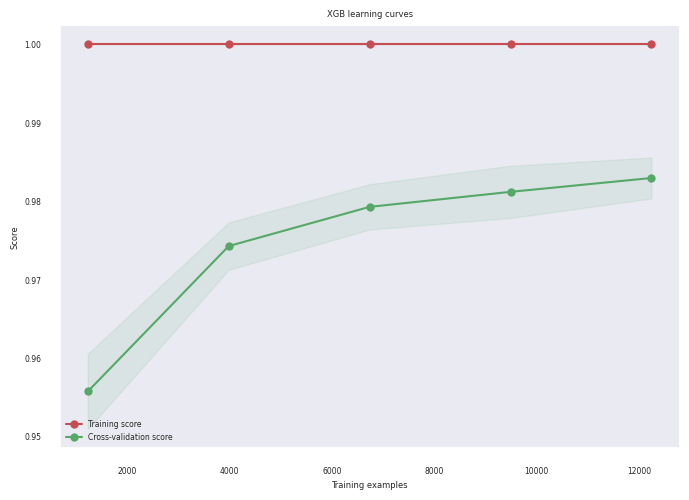

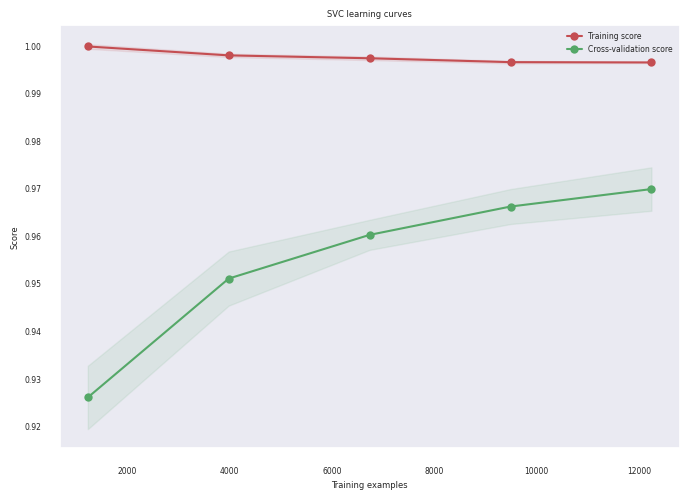

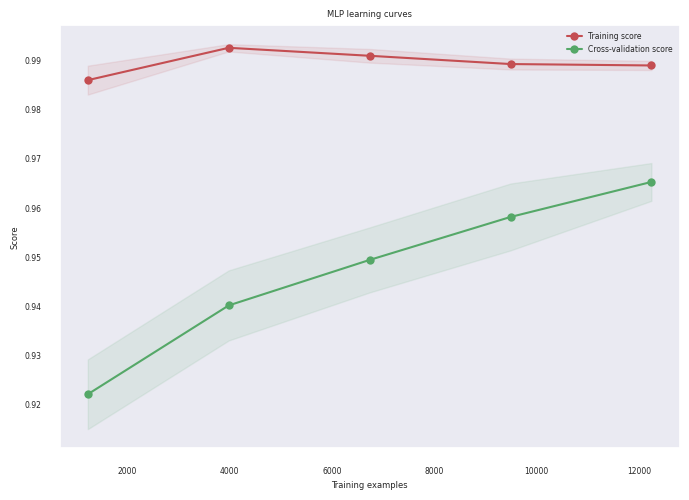

In [ ]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(grid_xgb.best_estimator_,"XGB learning curves",X_train_rfe,y_train,cv=kfold)
g = plot_learning_curve(grid_svm.best_estimator_,"SVC learning curves",X_train_rfe,y_train,cv=kfold)
g = plot_learning_curve(grid_mpl.best_estimator_,"MLP learning curves",X_train_rfe,y_train,cv=kfold)


## 8. Conclusiones

En el conjunto de datos a analizar se identificaron algunas características generales del conjunto de datos. Este consta de 10127 observaciones y 21 variables, incluyendo información sobre la edad de los clientes, status civil, nivel de educación, información sobre los productos contratados, la duración,  las tansacciones (monto y cantidad), la línea de credito,  la tasa de abandono, entre otros.

Se observó que la tasa de abandono en el conjunto de datos es de aproximadamente el 16,07%. Además, se encontró a que la edad promedio es aproximadamente 46 año.Además, el tiempo promedio que están activos es aproximadamente 3 años.Un cliente tiene, en promedio, un límite de crédito de \$8632, y se le renueva un saldo de \$1163.
El monto total de trnasacciones es, en promedio, de 4404 pesos, con una cantidad total de 64 transacciones.

Además, en nuestro dataset se cuenta con clientes del género femenino y masculino, contando con un total de 5358 clientes femeninos. Además, hay 7 niveles de educación, en donde 3128 clientes son graduados, con 4 estado civiles, contando con 4687 clientes casados.
En la categoría de ingresos, hay 6 categorías y se cuentan con 3561 clientes que tienen un ingreso menor al \$3561.
Y por último, en la categoría de tipos de tarjetas, la tarjeta "Blue" cuenta con 9436 clientes.

Vale mencionar que los factores que influyen en la  tasa de abandono son la cantidad y el monto de las tansacciones, y los meses inactivos que están aquellos clientes que abandonan, también si es una persona con estudios universitarios o no.

A partir de una análisis exploratorio de los datos se puede ver aquellos factores que influyen en el abandono de los clientes de un Banco.

Con respecto a los modelos de clasficación entrenados, se observó que a partir de la matriz de confusión y la curva de aprendizaje el modelo XGBoost overfittea. Del modelo SVM, se puede decir que tiene un buen aprendizaje. El mejor modelo de los tres es MLP, ya que su curva de aprendizajes y sus métricas fueron las mejores.-